# Superstore Churn 1.03: Feature Engineering and EDA

**May 2025**

by David Cochran

[Data Science @ Newman University](https://newmanu.edu/academics/graduate-programs/ms-data-science)


## Here is the process we will follow
[Download the flowchart - PNG image](https://1drv.ms/i/c/35b6a879f6dd9905/EdXwp5VFcP9JnIt3epTskPABP8COB5eD7ZVpzMuWUA42Cw?e=zLxVlO)

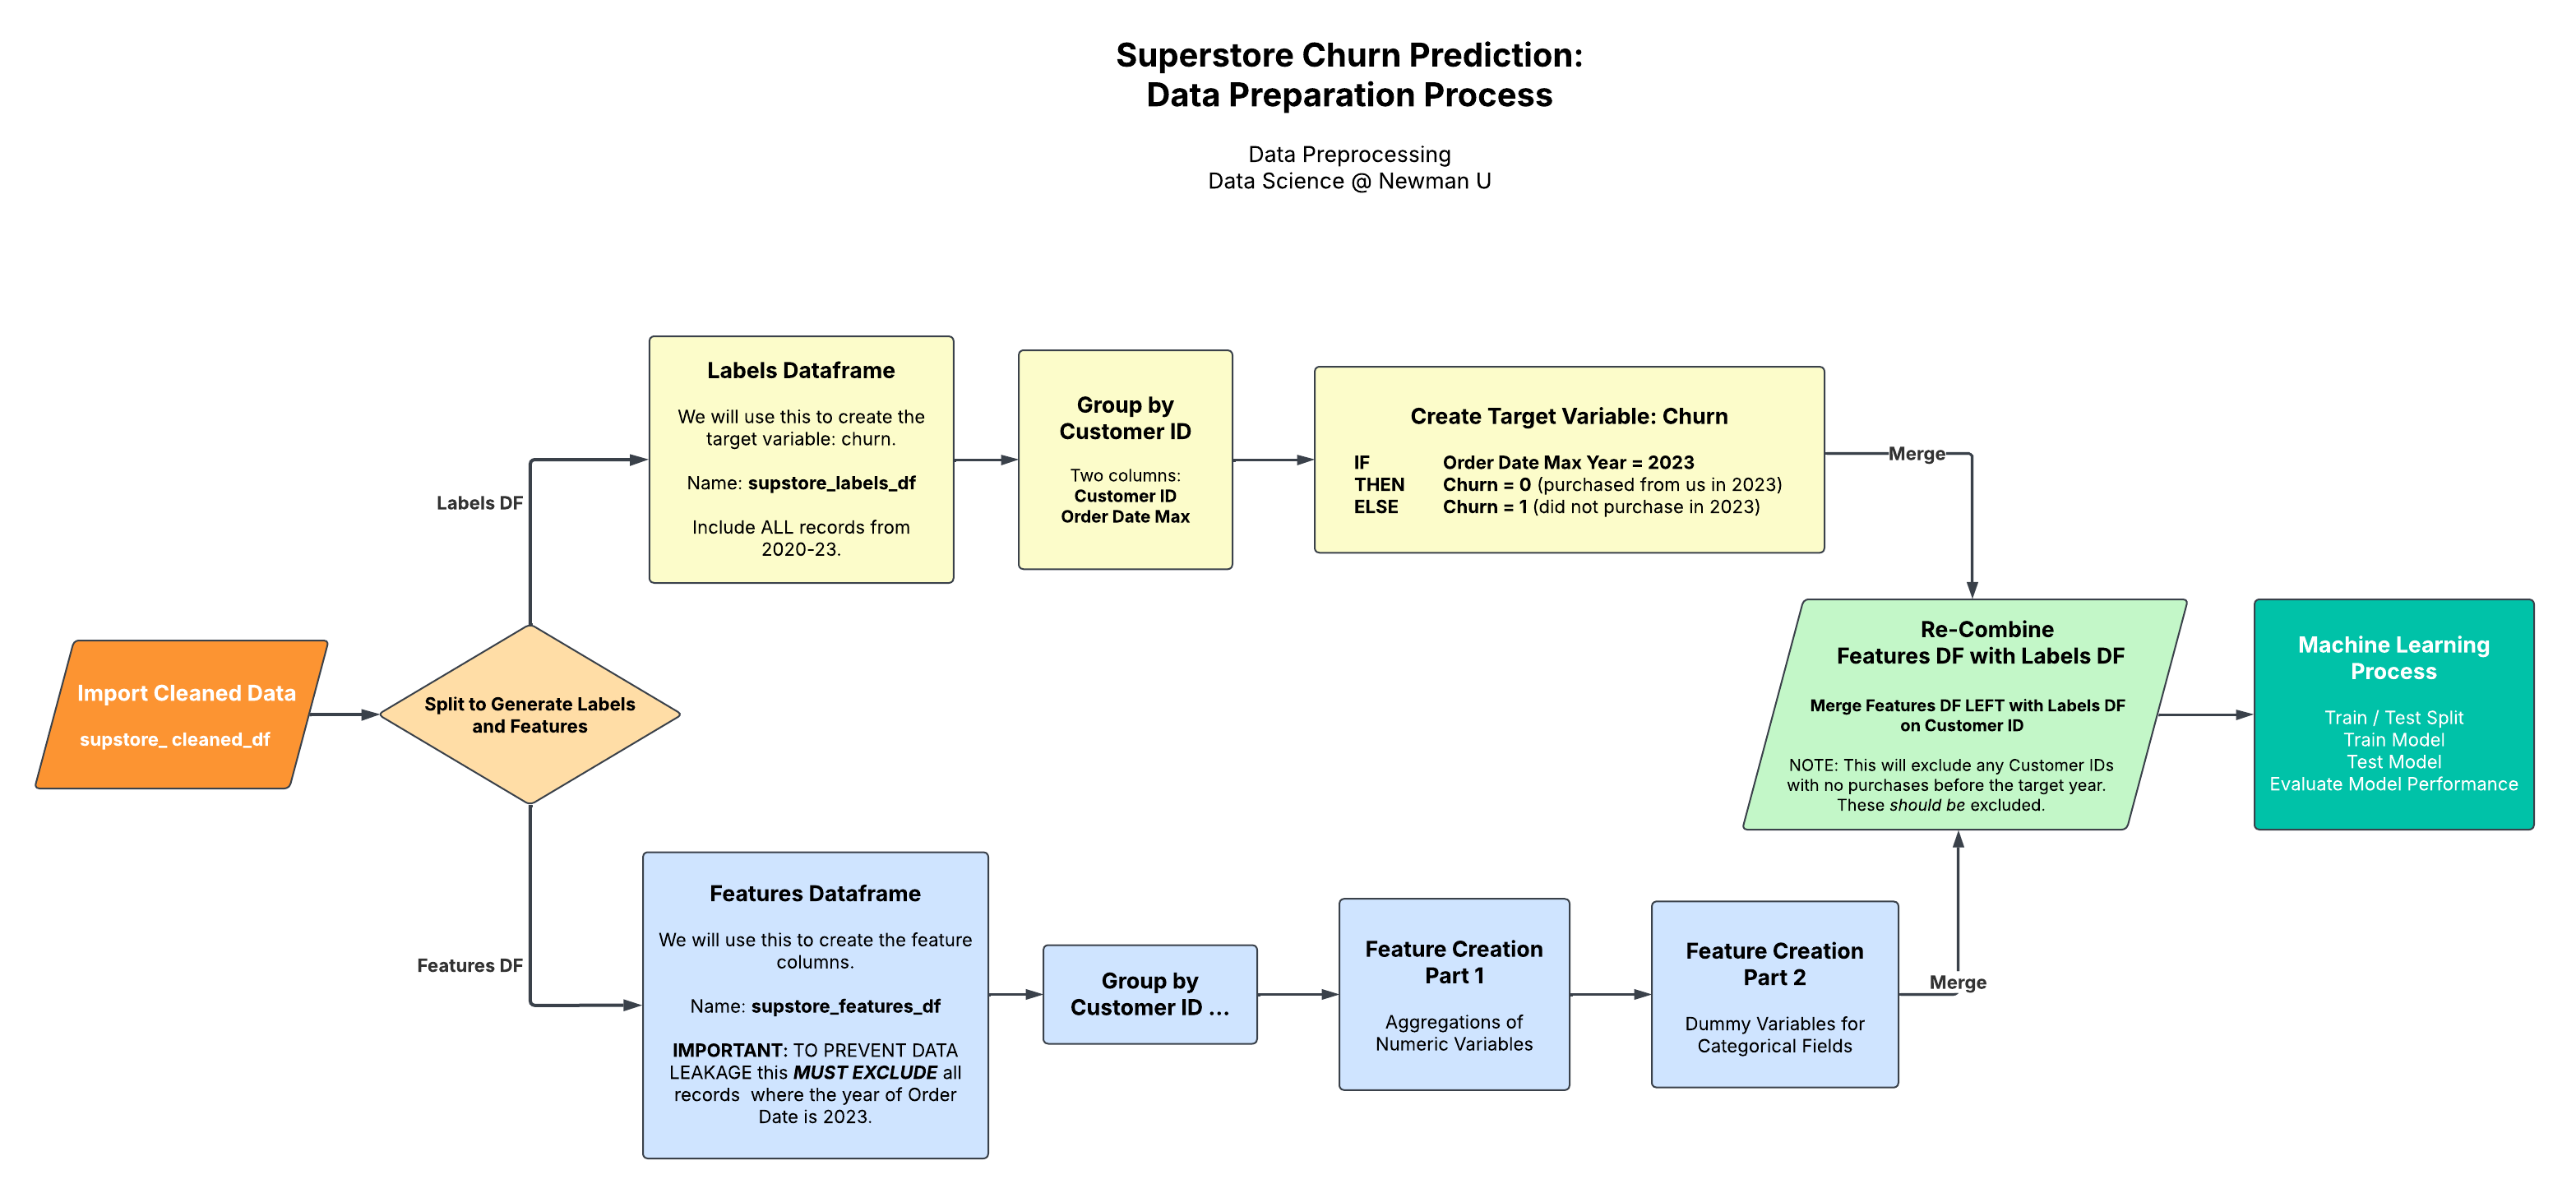

# Import Libraries and Set Notebook Defaults

In [1]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Jupyter Notebook customizations

# Remove scientific notation from descriptive stats
pd.options.display.float_format = '{:,.3f}'.format

# Display all columns of a dataframe
pd.set_option('display.max_columns', None)

# Widen columns
pd.set_option('display.max_colwidth', 150)

In [3]:
# Customize Seaborn Plot Styles

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size to support high-pixel-density screens
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

# Set color palettes for plots
# See Matplotlib named color options here: https://matplotlib.org/stable/gallery/color/named_colors.html
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turquoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turquoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp1)

In [4]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Cleaned Data

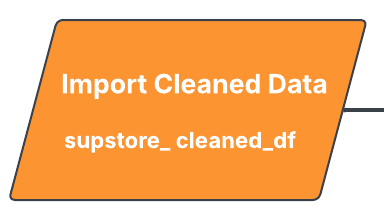

In [5]:
# Read from CSV
# Set appropriate data types

# Set file path
path = '/content/drive/MyDrive/Data Projects/Preprocessing/Superstore Preprocessing/data/Global_Superstore_Orders_2020_23.csv'

# Read data
# Set Postal Code datatype to string and fill to 5 digits with leading zeros
superstore_cleaned_df = pd.read_csv(path, dtype={'Postal Code': str})

# Fill postal codes to 5 characters with leading zeros when needed
superstore_cleaned_df['Postal Code'] = superstore_cleaned_df['Postal Code'].str.zfill(5)

# Convert dates to datetime
superstore_cleaned_df['Order Date'] = pd.to_datetime(superstore_cleaned_df['Order Date'])
superstore_cleaned_df['Ship Date'] = pd.to_datetime(superstore_cleaned_df['Ship Date'])

superstore_cleaned_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2020-01-01,2020-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",979.920,2,0.000,254.736,35.460,Medium
1,22253,IN-2012-JH159857-40909,2020-01-01,2020-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",288.878,3,0.100,86.486,9.720,Medium
2,48883,HU-2012-AT73557-40909,2020-01-01,2020-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",158.688,4,0.000,71.136,8.170,High
3,11731,IT-2012-EM14140124-40909,2020-01-01,2020-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",107.676,3,0.500,-62.532,4.820,High
4,22255,IN-2012-JH159857-40909,2020-01-01,2020-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",272.808,5,0.100,90.648,4.700,Medium


In [6]:
superstore_cleaned_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2023-12-31,2024-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",9.576,1,0.000,1.008,1.490,Medium
51286,27700,IN-2015-KM1622527-42369,2023-12-31,2024-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",190.728,3,0.000,60.912,1.410,Medium
51287,8857,MX-2015-CM1219093-42369,2023-12-31,2024-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",63.360,3,0.000,29.664,1.350,Medium
51288,2143,MX-2015-JB1604582-42369,2023-12-31,2024-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",40.176,3,0.000,1.584,1.324,Medium
51289,6852,MX-2015-TD2099582-42369,2023-12-31,2024-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",17.088,1,0.000,1.344,1.199,Medium


In [7]:
# Get number of rows and columns
superstore_cleaned_df.shape

(51290, 24)

In [8]:
# Dataframe fundamental info
superstore_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [9]:
superstore_cleaned_df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.000",51290,51290,"51,290.000","51,290.000","51,290.000","51,290.000","51,290.000"
mean,"25,645.500",2022-05-11 21:26:49.155780352,2022-05-15 20:42:42.745174528,591.577,3.477,0.143,68.666,26.479
min,1.000,2020-01-01 00:00:00,2020-01-03 00:00:00,1.066,1.000,0.000,"-15,839.947",1.002
25%,"12,823.250",2021-06-19 00:00:00,2021-06-23 00:00:00,73.821,2.000,0.000,0.000,2.610
50%,"25,645.500",2022-07-08 00:00:00,2022-07-12 00:00:00,204.127,3.000,0.000,22.176,7.790
75%,"38,467.750",2023-05-22 00:00:00,2023-05-26 00:00:00,602.528,5.000,0.200,88.344,24.450
max,"51,290.000",2023-12-31 00:00:00,2024-01-07 00:00:00,"54,332.352",14.000,0.850,"20,159.942",933.570
std,"14,806.292",NaN,NaN,"1,170.157",2.279,0.212,418.418,57.251


In [10]:
superstore_cleaned_df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,9994,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,631,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,10035,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,263,915,2001,9994,5883,14302,227,31289,6146,227,29433


# Create Labels Dataframe

We will create the first of two dataframes from superstore_cleaned_df:
- Customer_Labels

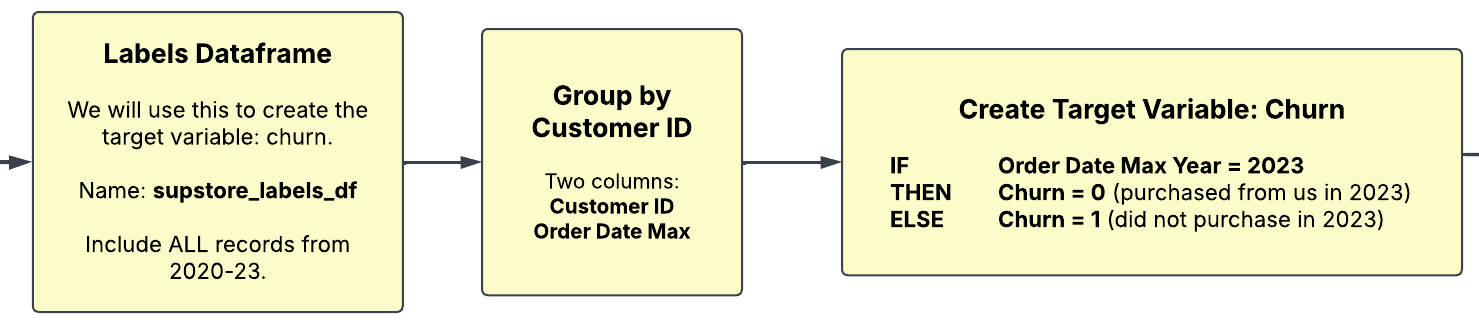

In [11]:
# Create Labels Dataframe
# Include all records
# Three columns: CustomerID (index), Order Date Min, and Order Date Max

# Group by Customer and aggregate the Min and Max Order Date
Customer_Labels = superstore_cleaned_df.groupby('Customer ID').agg(
    Min_Order_Date=('Order Date', 'min'),
    Max_Order_Date=('Order Date', 'max')
)

# Preview results
Customer_Labels.sample(12)

,Min_Order_Date,Max_Order_Date
Customer ID,,
TS-11205146,2023-02-27,2023-02-27
KB-6600117,2023-12-22,2023-12-22
JH-1598518,2022-03-19,2022-03-19
NC-18535143,2023-10-18,2023-10-18
DF-13135124,2022-04-11,2022-04-11
RB-1957045,2023-06-21,2023-06-21
TT-2107058,2021-10-04,2021-10-04
LD-1685539,2020-08-07,2020-08-07
RS-9765137,2023-08-30,2023-08-30


**Eliminate all Customers who did not make a purchase before 2023.**

- We are only interested in customers who made a first purchase prior to 2023.

- Non-churners purchased before 2023 and then made another in 2023.

- Churners also purchased before 2023 but then did not return in 2023.

So: Eliminate all customers from our list who made no purchases before 2023.

In [12]:
# Remove all customers whose Min Order Date year is 2023.

Customer_Labels = Customer_Labels[Customer_Labels['Min_Order_Date'].dt.year < 2023]

Customer_Labels.sample(12)


,Min_Order_Date,Max_Order_Date
Customer ID,,
JB-154001402,2020-09-13,2023-12-24
CW-1190536,2020-11-28,2020-11-28
TH-2155051,2022-12-07,2023-03-24
RC-19960139,2020-08-03,2020-10-06
JM-1558018,2020-05-16,2023-09-03
JL-5130134,2020-09-07,2020-09-07
RC-19825101,2021-12-14,2021-12-14
SE-2011098,2021-09-18,2021-09-18
PW-190308,2022-12-11,2022-12-11


In [13]:
# View Labels Dataframe Stats
Customer_Labels.describe()

,Min_Order_Date,Max_Order_Date
count,12780,12780
mean,2021-08-02 21:05:21.126760704,2022-04-01 20:57:54.929577472
min,2020-01-01 00:00:00,2020-01-01 00:00:00
25%,2020-11-02 00:00:00,2021-06-16 00:00:00
50%,2021-08-17 00:00:00,2022-05-27 00:00:00
75%,2022-05-18 00:00:00,2022-12-20 00:00:00
max,2022-12-31 00:00:00,2023-12-31 00:00:00


In [14]:
# Create Churn Target Variable
# If the Year of Max Order Date == 2023
# Then Churn = 0
# Else Churn = 1

Customer_Labels['Churn'] = np.where(Customer_Labels['Max_Order_Date'].dt.year == 2023, 0, 1)

Customer_Labels.head()

,Min_Order_Date,Max_Order_Date,Churn
Customer ID,,,
AA-10315102,2020-07-03,2023-01-07,0
AA-10315120,2021-05-16,2021-05-16,1
AA-10315139,2022-09-19,2023-08-04,0
AA-103151402,2022-03-04,2023-06-30,0
AA-103151404,2020-03-30,2021-10-04,1


In [15]:
# Drop the order date fields, so that we have only Customer ID and Churn
Customer_Labels = Customer_Labels.drop(columns=['Min_Order_Date', 'Max_Order_Date'])
Customer_Labels.head(12)

,Churn
Customer ID,
AA-10315102,0
AA-10315120,1
AA-10315139,0
AA-103151402,0
AA-103151404,1
AA-103151406,1
AA-1031548,1
AA-1031558,0
AA-1031582,1


In [16]:
# Compare number of Churn = 1 versus Churn = 0
Customer_Labels['Churn'].value_counts()

,count
Churn,
1,9791
0,2989


In [17]:
# Get proportions as percentage
Customer_Labels['Churn'].value_counts(normalize=True)

,proportion
Churn,
1,0.766
0,0.234


# Create Features Dataframe

Eliminate all records from 2023 to ensure there is no data leakage.

**transaction_features** will provide the record of original transactions

**Customer_Features** will aggregate the features by Customer ID and will provide the features we will need machine learning.

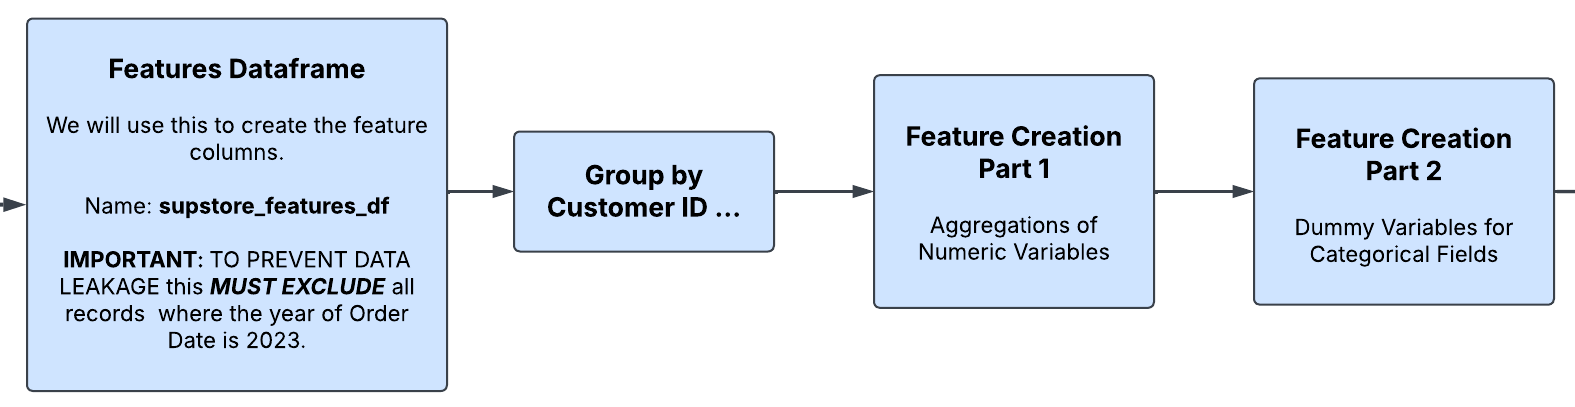

In [18]:
# Create Features Dataframe
# Eliminate all records from 2023 to ensure there is no data leakage
# In this present form, it is a history of transactions, so we will name it *transaction_features*
transaction_features = superstore_cleaned_df[superstore_cleaned_df['Order Date'] < '2023-01-01']
transaction_features.sample(25)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
24128,20849,ID-2014-AZ1075027-41796,2022-06-06,2022-06-10,Standard Class,AZ-1075027,Annie Zypern,Consumer,NaN,Wuhan,Hubei,China,Eastern Asia,Asia Pacific,TEC-AC-4166,Technology,Accessories,"Enermax Memory Card, USB",550.080,4,0.500,-374.112,29.000,High
24073,33898,CA-2014-EN13780140-41795,2022-06-05,2022-06-05,Same Day,EN-137801406,Edward Nazzal,Consumer,10035,New York City,New York,United States,Eastern US,USCA,OFF-FA-6129,Office Supplies,Fasteners,Staples,35.856,3,0.000,16.852,1.340,High
15355,38787,CA-2013-FA14230140-41527,2021-09-10,2021-09-16,Standard Class,FA-142301404,Frank Atkinson,Corporate,90032,Los Angeles,California,United States,Western US,USCA,FUR-FU-5983,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",256.032,6,0.000,79.370,9.580,Medium
1895,12810,ES-2012-SS2014064-41027,2020-04-28,2020-05-02,Standard Class,SS-2014064,Saphhira Shifley,Corporate,NaN,Cesena,Emilia-Romagna,Italy,Southern Europe,Europe,OFF-AR-5932,Office Supplies,Art,"Sanford Sketch Pad, Fluorescent",224.352,2,0.000,105.408,6.110,High
20460,22247,IN-2014-BN1151527-41661,2022-01-22,2022-01-27,Standard Class,BN-1151527,Bradley Nguyen,Consumer,NaN,Wuxi,Hunan,China,Eastern Asia,Asia Pacific,OFF-SU-4123,Office Supplies,Supplies,"Elite Ruler, Easy Grip",111.024,3,0.000,26.568,2.120,Medium
27217,46871,CA-2014-JR621023-41871,2022-08-20,2022-08-26,Standard Class,JR-621023,Justin Ritter,Corporate,NaN,Dartmouth,Nova Scotia,Canada,Canada,USCA,FUR-CH-5409,Furniture,Chairs,"Novimex Steel Folding Chair, Set of Two",405.504,2,0.000,20.160,6.740,Medium
31915,22722,IN-2014-PL1892527-41969,2022-11-26,2022-12-03,Standard Class,PL-1892527,Paul Lucas,Home Office,NaN,Weifang,Shandong,China,Eastern Asia,Asia Pacific,OFF-SU-4118,Office Supplies,Supplies,"Elite Box Cutter, Serrated",530.712,7,0.000,233.352,13.280,Medium
23367,39030,CA-2014-MN17935140-41775,2022-05-16,2022-05-20,Second Class,MN-179351406,Michael Nguyen,Consumer,45503,Springfield,Ohio,United States,Eastern US,USCA,OFF-PA-6310,Office Supplies,Paper,"TOPS Voice Message Log Book, Flash Format",36.557,4,0.200,13.252,1.750,Medium
12856,22632,IN-2013-SC2084527-41445,2021-06-20,2021-06-22,First Class,SC-2084527,Sung Chung,Consumer,NaN,Shenyang,Liaoning,China,Eastern Asia,Asia Pacific,TEC-PH-5839,Technology,Phones,"Samsung Smart Phone, Cordless","3,067.200",2,0.000,"1,104.192",284.810,High
3955,30769,IN-2012-QJ1925592-41122,2020-08-01,2020-08-06,Second Class,QJ-1925592,Quincy Jones,Corporate,NaN,Tauranga,Bay of Plenty,New Zealand,Oceania,Asia Pacific,OFF-AR-5912,Office Supplies,Art,"Sanford Highlighters, Fluorescent",81.648,2,0.000,26.928,2.500,Medium


In [19]:
# Get features dataframe info
transaction_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33759 entries, 0 to 33758
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          33759 non-null  int64         
 1   Order ID        33759 non-null  object        
 2   Order Date      33759 non-null  datetime64[ns]
 3   Ship Date       33759 non-null  datetime64[ns]
 4   Ship Mode       33759 non-null  object        
 5   Customer ID     33759 non-null  object        
 6   Customer Name   33759 non-null  object        
 7   Segment         33759 non-null  object        
 8   Postal Code     6675 non-null   object        
 9   City            33759 non-null  object        
 10  State           33759 non-null  object        
 11  Country         33759 non-null  object        
 12  Region          33759 non-null  object        
 13  Market          33759 non-null  object        
 14  Product ID      33759 non-null  object        
 15  Categor

In [20]:
# Double check to ensure we include NO RECORDS with Order Date in 2023
# Get max order date of Features Dataframe
transaction_features['Order Date'].max()

Timestamp('2022-12-31 00:00:00')

In [21]:
# TRIPLE check to ensure we include NO RECORDS with Order Date in 2023
# Sort Features Dataframe from Latest Order Date and viewing head()
transaction_features.sort_values(by='Order Date', ascending=False).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
33758,49701,IZ-2014-DM301561-42004,2022-12-31,2023-01-02,Second Class,DM-301561,Darrin Martin,Consumer,NaN,Basra,Al Basrah,Iraq,Western Asia,Asia Pacific,OFF-BI-6380,Office Supplies,Binders,"Wilson Jones Binder, Economy",31.248,1,0.000,9.648,1.140,Medium
33714,39963,CA-2014-CJ11875140-42004,2022-12-31,2023-01-03,First Class,CJ-118751406,Carl Jackson,Corporate,19140,Philadelphia,Pennsylvania,United States,Eastern US,USCA,OFF-AR-5286,Office Supplies,Art,Newell 31,39.648,5,0.200,3.965,1.420,High
33727,5255,MX-2014-AH1046593-42004,2022-12-31,2023-01-01,First Class,AH-1046593,Amy Hunt,Consumer,NaN,León,León,Nicaragua,Central America,LATAM,OFF-PA-3995,Office Supplies,Paper,"Eaton Memo Slips, Multicolor",121.200,5,0.000,12.000,11.382,High
33726,40579,CA-2014-EH14185140-42004,2022-12-31,2023-01-05,Standard Class,EH-141851408,Evan Henry,Consumer,33407,West Palm Beach,Florida,United States,Southern US,USCA,OFF-PA-4139,Office Supplies,Paper,Embossed Ink Jet Note Cards,173.338,4,0.200,60.668,2.860,Medium
33725,28024,IN-2014-BD11635144-42004,2022-12-31,2023-01-04,Standard Class,BD-11635144,Brian Derr,Consumer,NaN,Hanoi,Thủ Dô Hà Nội,Vietnam,Southeastern Asia,Asia Pacific,FUR-BO-3615,Furniture,Bookcases,"Bush 3-Shelf Cabinet, Metal",431.918,2,0.370,47.870,12.300,Medium


# Create and Explore Numeric and Date Features

We will use **transaction_features** to create **Customer_Features**.

- **transaction_features** = Dataset of transactions excluding 2023 target year

- **Customer_Features** = Dataset grouped by Customer ID, where we will collect our final features for machine learning

## Create Numeric Features
1. **Transactions:** Row ID Count
1. **Avg Quantity:** Quantity Mean
1. **Avg Sales:** Sales Mean
1. **Total Sales:** Sales Sum
1. **Avg Profit:** Profit Mean
1. **Total Profit:** Profit Sum
1. **Avg Discount:** Discount Mean
1. **Avg Ship Cost:** Shipping Cost Mean

In [22]:
# Groupby Customer ID and use aggregations for the earliest Order Date, the most recent Order Date,
# Mean Sales, Total Sales, Mean Profit, Total Profit, and a Count of all orders by each customer
# Use the Customer ID as the new row index

Customer_Features = transaction_features.groupby('Customer ID').agg(
    Transactions=('Row ID', 'count'),
    Avg_Quantity=('Quantity', 'mean'),
    Avg_Sales=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Avg_Discount=('Discount', 'mean'),
    Avg_Ship_Cost=('Shipping Cost', 'mean')
)

# Display updated dataframe (optional)
Customer_Features.sample(25)

,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost
Customer ID,,,,,,,,
JC-16105124,1,5.000,279.216,279.216,-377.064,-377.064,0.600,7.790
TC-214751406,1,8.000,81.408,81.408,31.749,31.749,0.000,1.860
ES-140801406,3,3.667,510.272,"1,530.816",-7.162,-21.487,0.100,35.277
JB-160451404,1,6.000,"1,598.112","1,598.112",255.698,255.698,0.000,43.940
LW-6990134,6,3.333,101.347,608.083,-86.801,-520.805,0.600,2.957
BW-111101406,6,4.500,136.996,821.976,51.751,310.507,0.000,6.553
JH-1543051,2,4.500,144.576,289.152,20.448,40.896,0.000,3.528
ES-402023,1,6.000,"1,765.152","1,765.152",652.752,652.752,0.000,72.340
TA-2138558,1,4.000,459.072,459.072,68.832,68.832,0.000,25.000


## Explore Numeric Features

**Superstore_Churn_DF** = Churn Label plus features

In [23]:
Superstore_Churn_DF = Customer_Labels.merge(Customer_Features, on='Customer ID', how='left')
Superstore_Churn_DF.head(12)

,Churn,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost
Customer ID,,,,,,,,,
AA-10315102,0,4,5.750,242.837,971.348,-106.939,-427.756,0.450,11.338
AA-10315120,1,1,7.000,"6,512.184","6,512.184",65.016,65.016,0.000,167.350
AA-10315139,0,4,2.000,210.348,841.392,55.566,222.264,0.000,22.852
AA-103151402,0,4,3.500,"2,643.643","10,574.573",-448.261,"-1,793.045",0.200,71.680
AA-103151404,1,3,2.000,602.806,"1,808.419",219.546,658.637,0.067,21.120
AA-103151406,1,2,2.500,35.400,70.800,15.939,31.878,0.000,1.650
AA-1031548,1,1,4.000,163.555,163.555,54.403,54.403,0.100,5.350
AA-1031558,0,1,4.000,"1,198.656","1,198.656",431.424,431.424,0.000,30.630
AA-1031582,1,5,4.200,303.754,"1,518.768",109.901,549.504,0.000,12.032


In [24]:
Superstore_Churn_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12780 entries, AA-10315102 to ZD-2192596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Churn          12780 non-null  int64  
 1   Transactions   12780 non-null  int64  
 2   Avg_Quantity   12780 non-null  float64
 3   Avg_Sales      12780 non-null  float64
 4   Total_Sales    12780 non-null  float64
 5   Avg_Profit     12780 non-null  float64
 6   Total_Profit   12780 non-null  float64
 7   Avg_Discount   12780 non-null  float64
 8   Avg_Ship_Cost  12780 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 998.4+ KB


In [25]:
Superstore_Churn_DF.describe()

,Churn,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost
count,"12,780.000","12,780.000","12,780.000","12,780.000","12,780.000","12,780.000","12,780.000","12,780.000","12,780.000"
mean,0.766,2.642,3.418,587.421,"1,566.692",65.388,180.900,0.144,26.550
std,0.423,2.077,1.778,865.436,"2,369.420",307.056,777.986,0.204,46.221
min,0.000,1.000,1.000,2.045,2.045,"-7,343.568","-16,541.700",0.000,1.002
25%,1.000,1.000,2.000,130.176,214.682,-1.355,-2.052,0.000,4.934
50%,1.000,2.000,3.000,319.917,697.968,35.813,65.567,0.001,12.413
75%,1.000,3.000,4.289,694.130,"1,958.008",113.302,292.694,0.233,29.547
max,1.000,20.000,14.000,"16,799.904","56,786.947","5,907.168","20,988.152",0.800,910.160


In [26]:
# Create features list
features = list(Superstore_Churn_DF.drop(columns='Churn').columns)
features

['Transactions',
 'Avg_Quantity',
 'Avg_Sales',
 'Total_Sales',
 'Avg_Profit',
 'Total_Profit',
 'Avg_Discount',
 'Avg_Ship_Cost']

In [27]:
len(features)

8

In [28]:
# Define data and target for upcoming visualizations
data = Superstore_Churn_DF
target = 'Churn'

In [29]:
# Define function to view feature distributions and statistics, grouped by target variable
def view_distributions(data, feature, binwidth):

  # Histplot
  plt.figure(figsize=(7,3))
  ax = sns.histplot(data=data, x=feature, hue=target, binwidth=binwidth, alpha=0.6);
  plt.title(f"{feature} Distribution by Churn", fontsize=12, fontweight='bold')

  # Boxplot
  plt.figure(figsize=(7,2))
  ax = sns.boxplot(data=data, x=feature, y=target, hue=target, orient='h');
  ax.set_xlabel('')
  ax.legend_.remove()
  plt.title(f"Boxplot", fontsize=10, fontweight='bold')

  # Boxplot without Outliers
  plt.figure(figsize=(7,1))
  ax = sns.boxplot(data=data, x=feature, y=target, hue=target, orient='h', showfliers=False);
  ax.set_xlabel('')
  ax.legend_.remove()
  plt.title(f"OUTLIERS HIDDEN", fontsize=9, fontweight='bold')

  # Show plots
  plt.show()

  # Descriptive Stats
  print('\n')
  display(data.groupby(target)[feature].describe())
  print('\n')

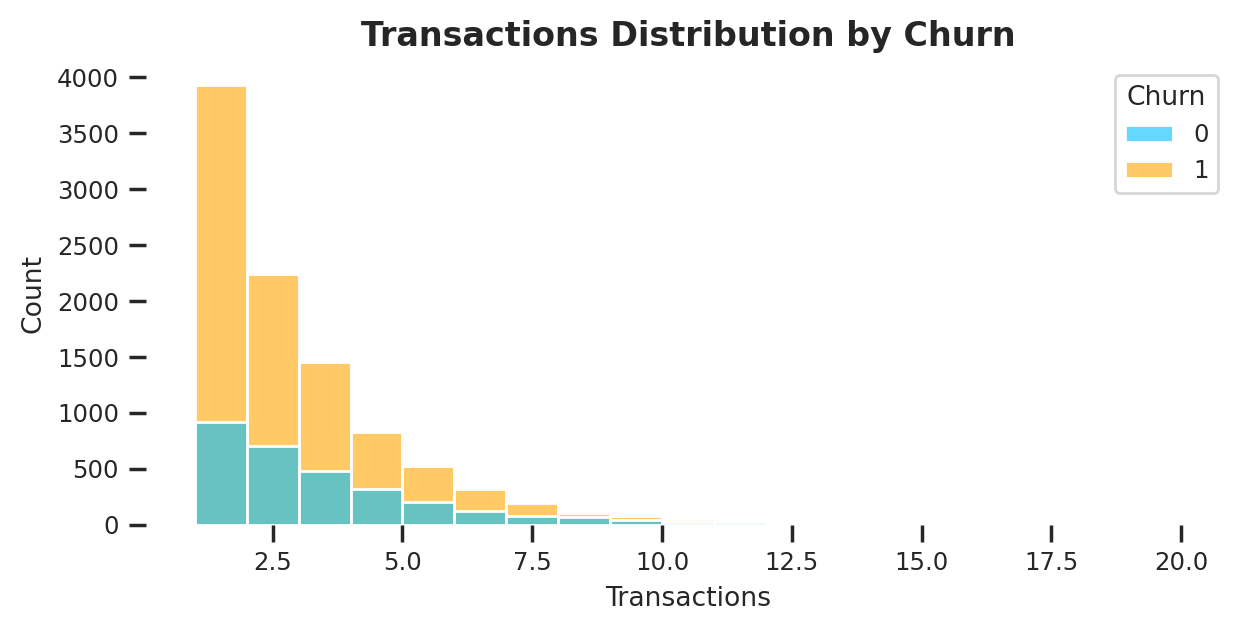

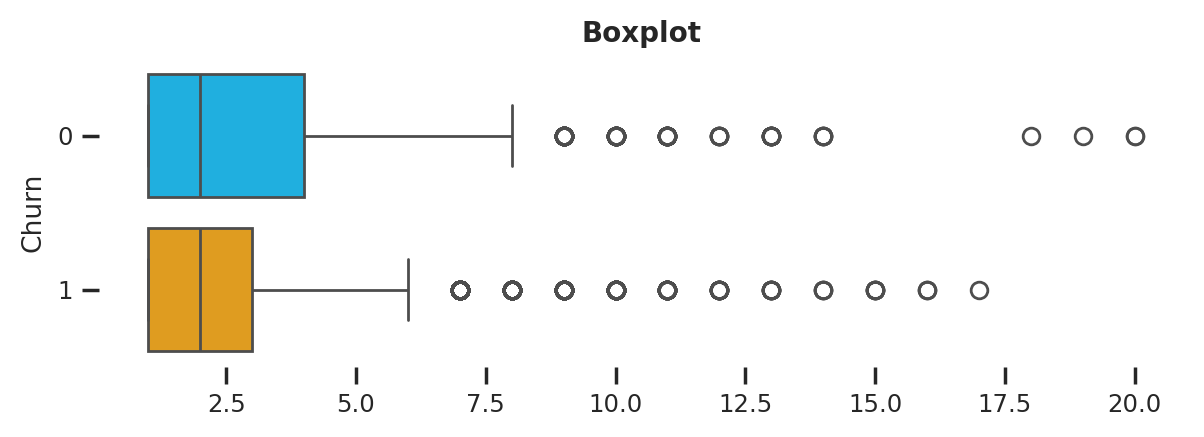

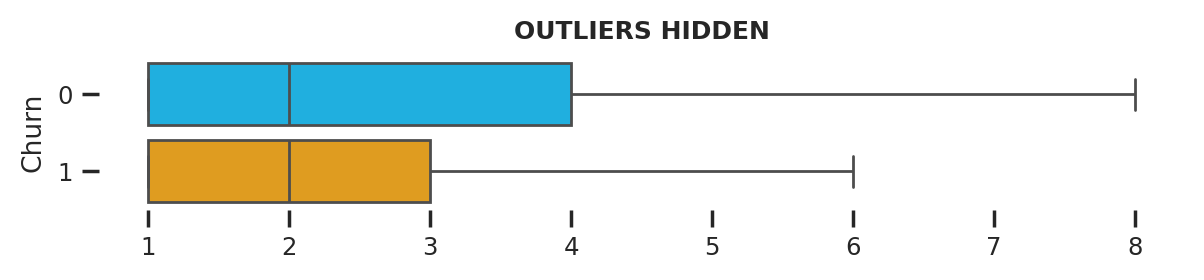

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",3.010,2.347,1.000,1.000,2.000,4.000,20.000
1,"9,791.000",2.529,1.973,1.000,1.000,2.000,3.000,17.000


In [30]:
# Already defined:
# data = Superstore_Churn_DF
# target = 'Churn'

feature = 'Transactions'

# Leave binwidth None, then adjust it to fit the data if desired
binwidth = 1

# Call the above-defined function
view_distributions(data, feature, binwidth)

**NOTE:** The upper quartiles of Non-Churners tend to have more transactions. The lower quartiles have only 1 or 2, which is the same for Churners.

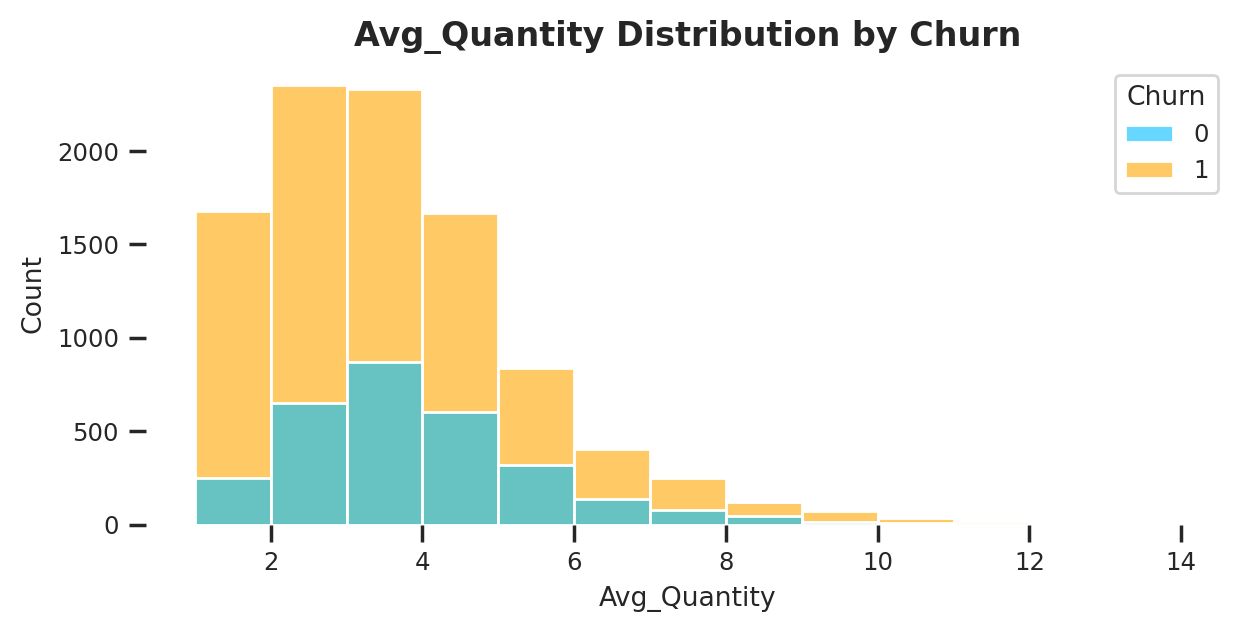

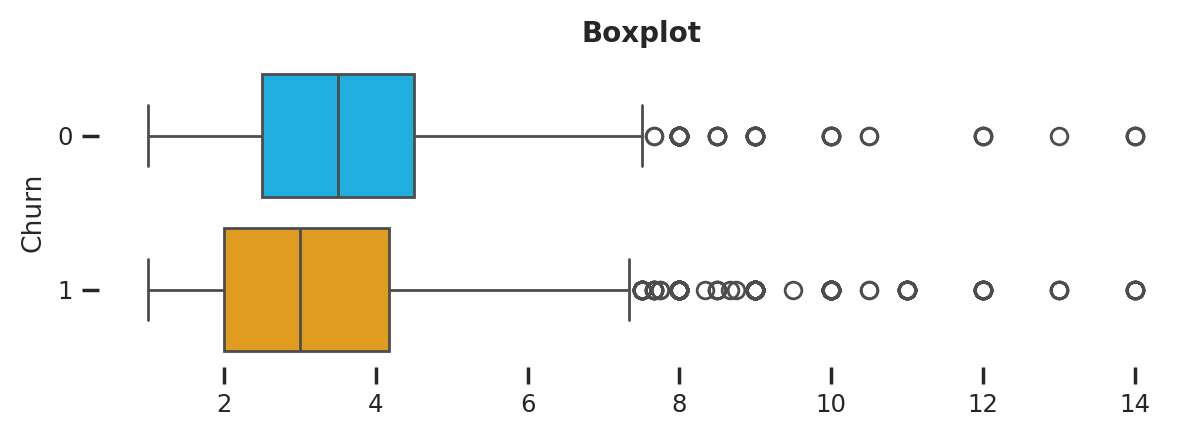

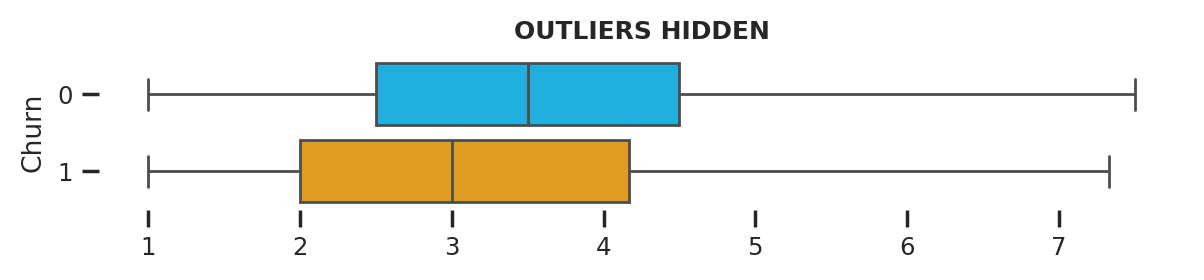

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",3.659,1.674,1.000,2.500,3.500,4.500,14.000
1,"9,791.000",3.344,1.803,1.000,2.000,3.000,4.167,14.000


In [31]:
feature = 'Avg_Quantity'
binwidth = 1
view_distributions(data, feature, binwidth)

**NOTE**: Churners tend to purchase in lower quantities.

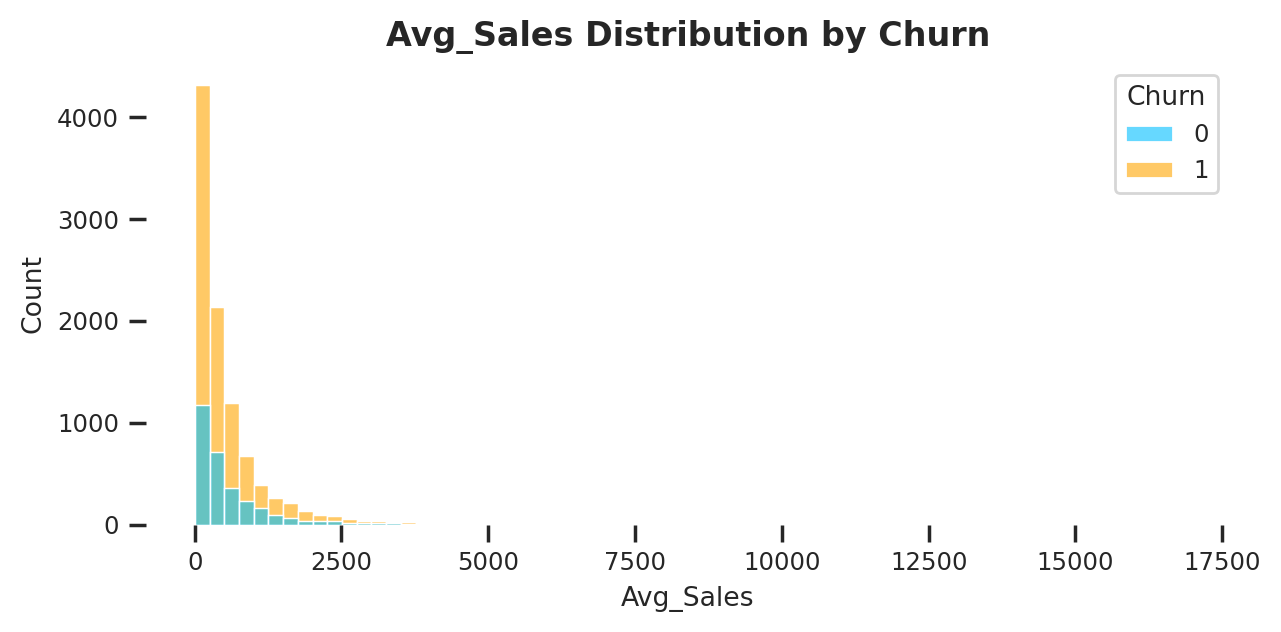

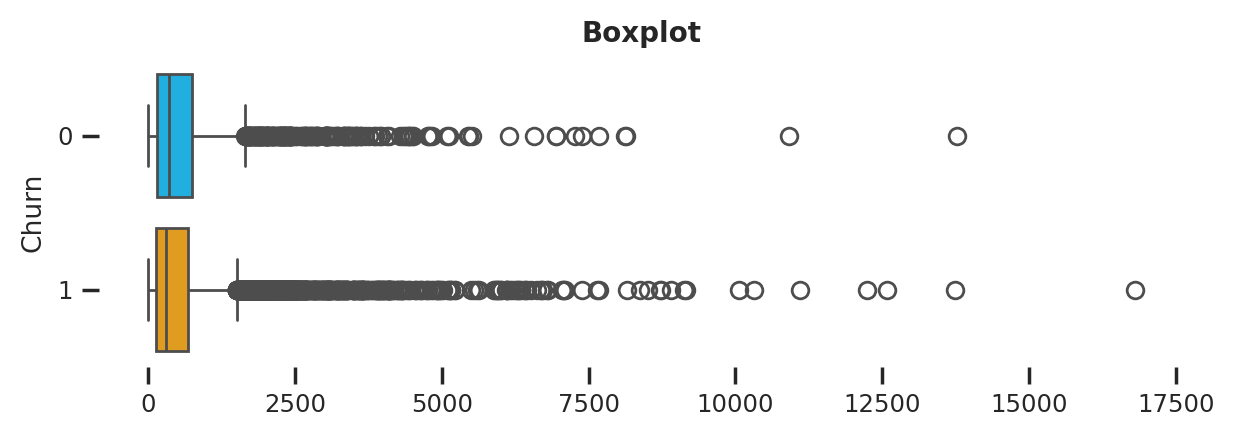

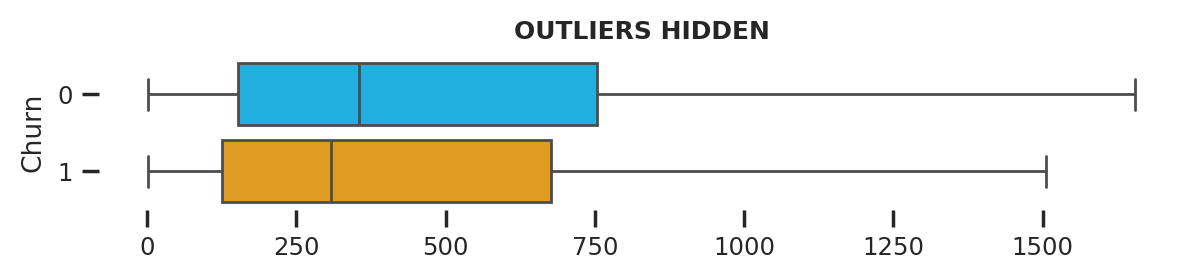

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",620.834,861.346,2.102,152.352,354.496,753.804,"13,770.000"
1,"9,791.000",577.220,866.468,2.045,125.014,308.358,677.196,"16,799.904"


In [32]:
feature = 'Avg_Sales'
binwidth = 250
view_distributions(data, feature, binwidth)

**NOTE**: Churners tend to make smaller purchases measured in dollars.

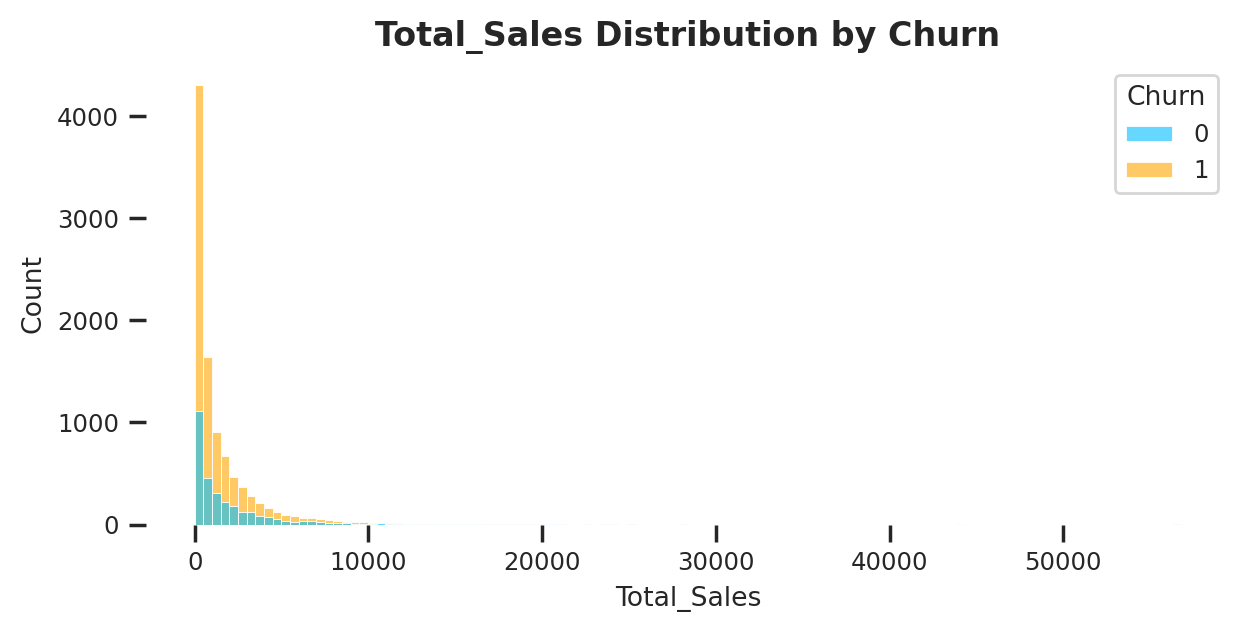

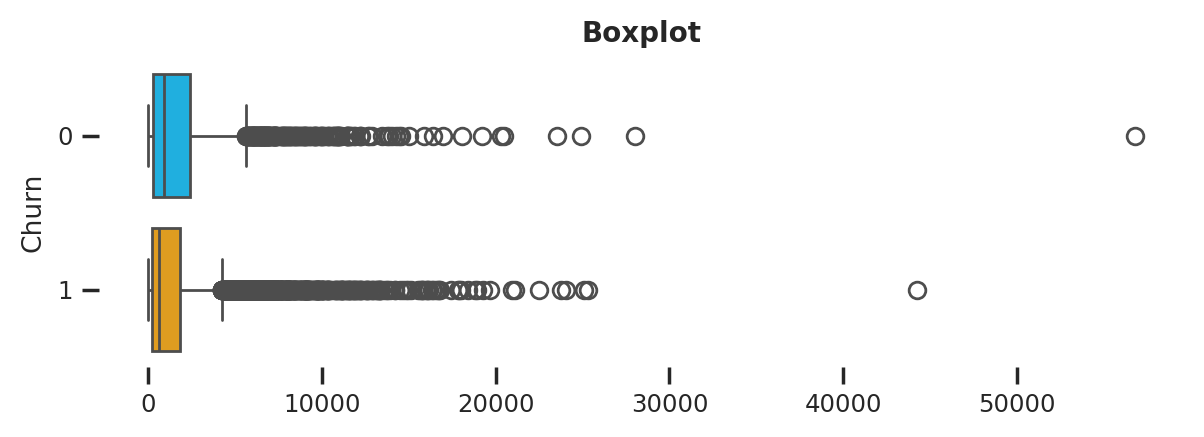

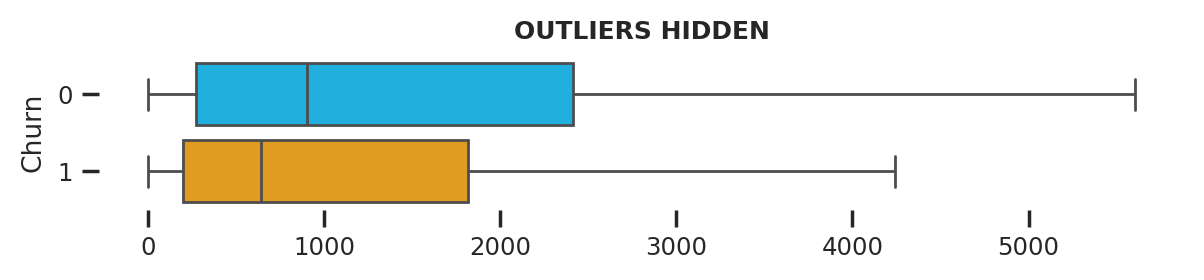

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000","1,853.227","2,697.810",2.102,275.482,900.864,"2,412.264","56,786.947"
1,"9,791.000","1,479.219","2,252.583",2.045,199.944,642.989,"1,817.834","44,249.131"


In [33]:
feature = 'Total_Sales'
binwidth = 500
view_distributions(data, feature, binwidth)

**NOTE**: Churners tend to have purchased less over their lifespan.

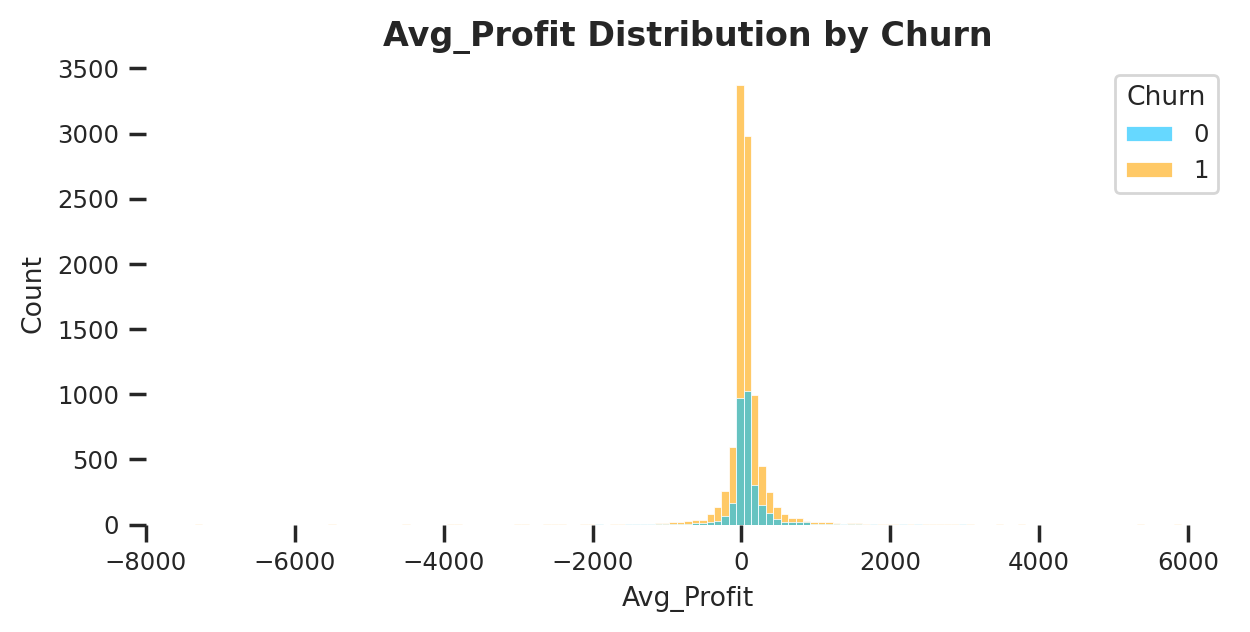

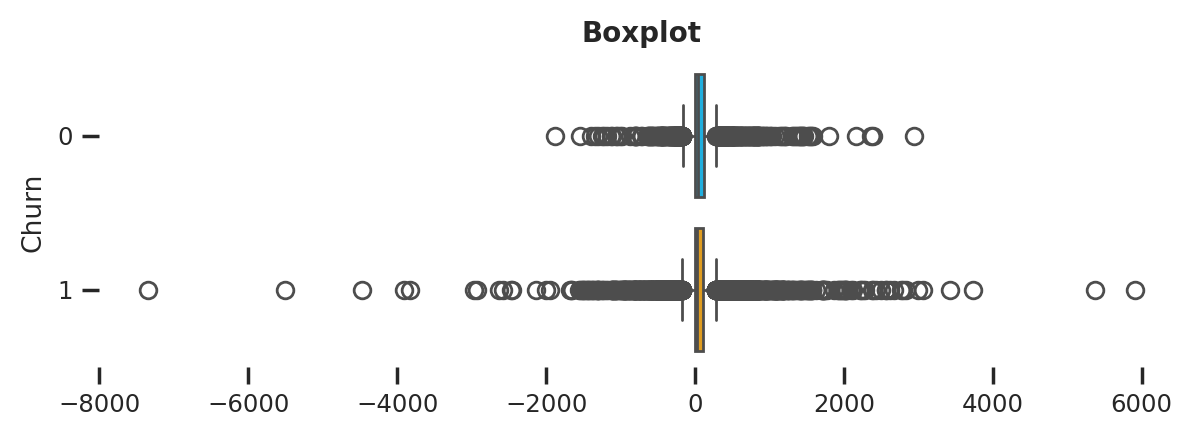

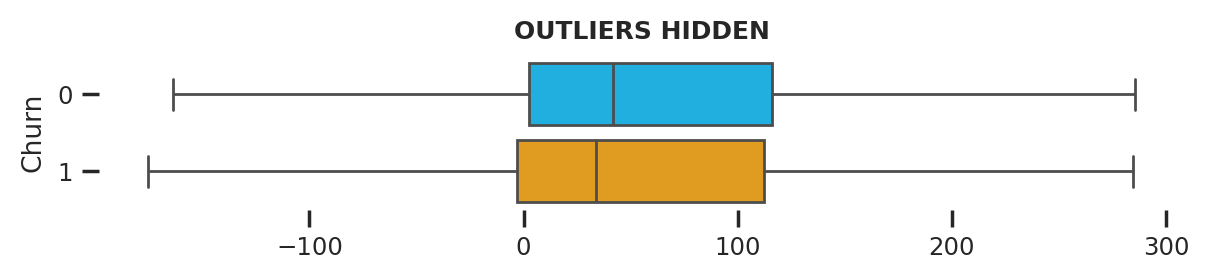

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",77.592,254.016,"-1,886.640",2.592,41.688,115.856,"2,947.629"
1,"9,791.000",61.662,321.429,"-7,343.568",-3.058,33.804,112.068,"5,907.168"


In [34]:
feature = 'Avg_Profit'
binwidth = 100
view_distributions(data, feature, binwidth)

**NOTE**: Churners tend to have slighly lower average profit histories.

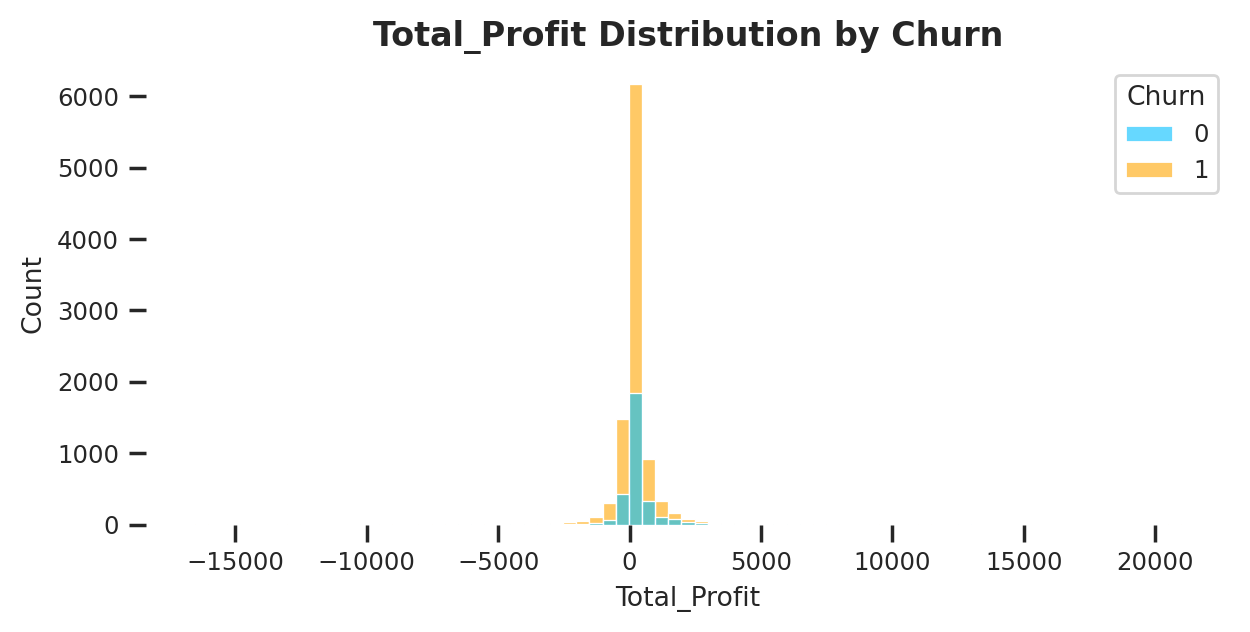

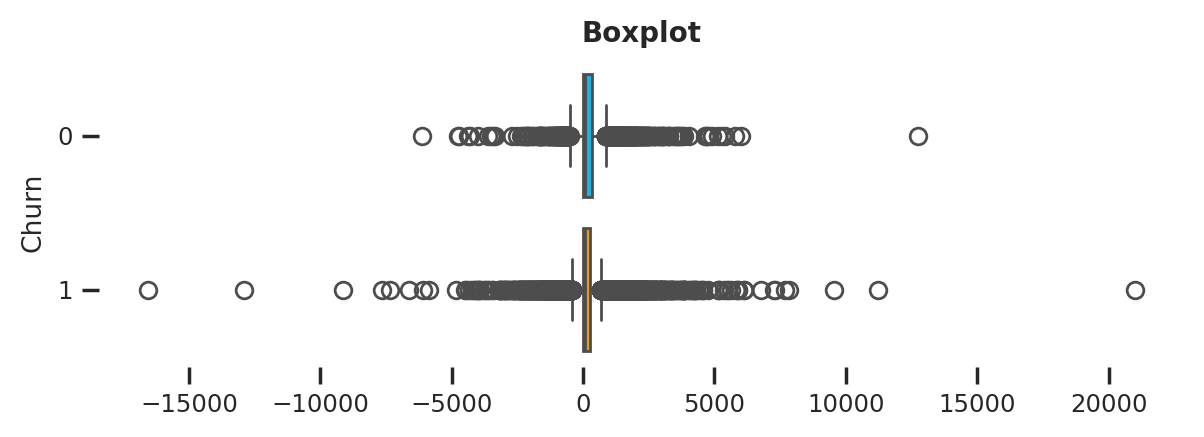

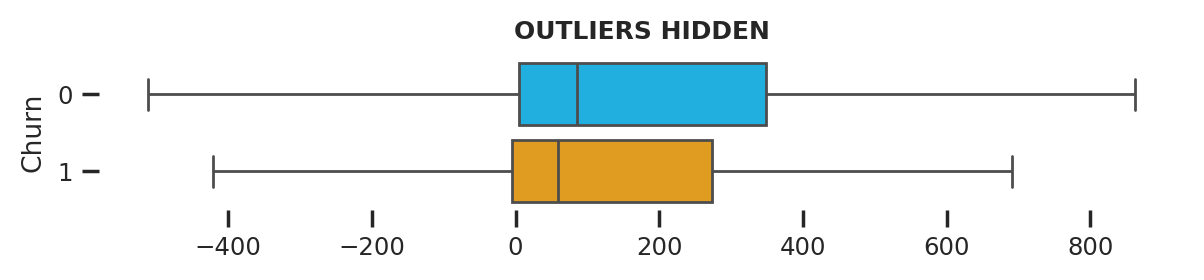

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",236.574,753.326,"-6,117.768",4.128,86.112,347.892,"12,725.354"
1,"9,791.000",163.903,784.611,"-16,541.700",-4.520,59.400,274.061,"20,988.152"


In [35]:
feature = 'Total_Profit'
binwidth = 500
view_distributions(data, feature, binwidth)

**NOTE**: Churners tend to have been less profitable overall.

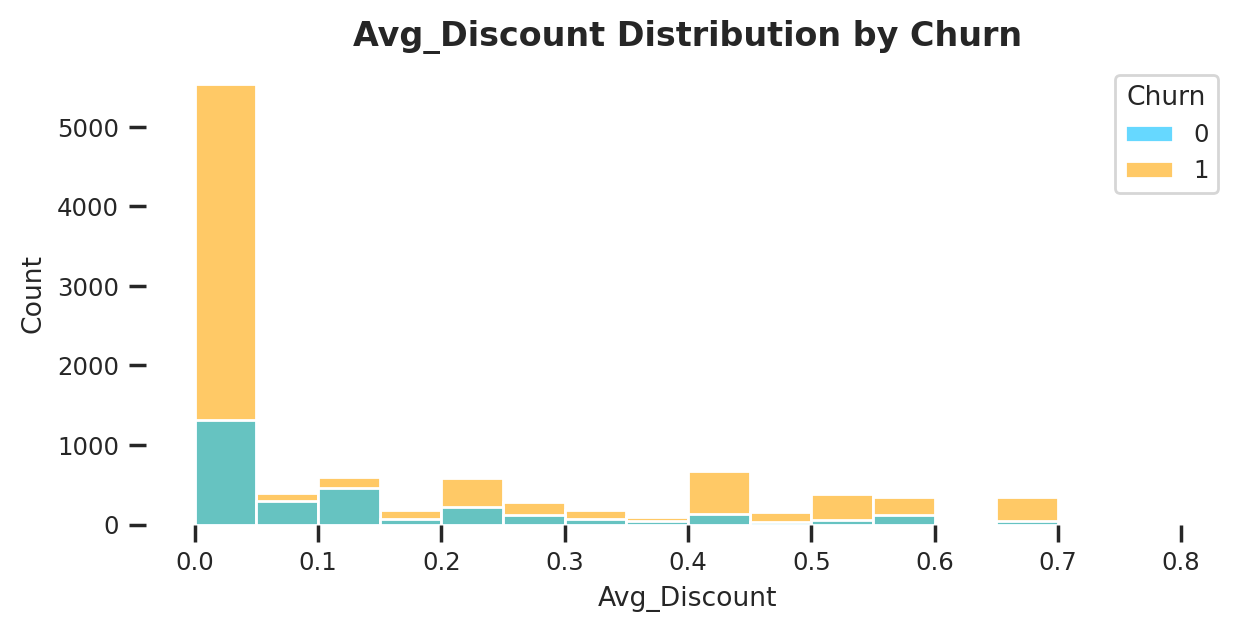

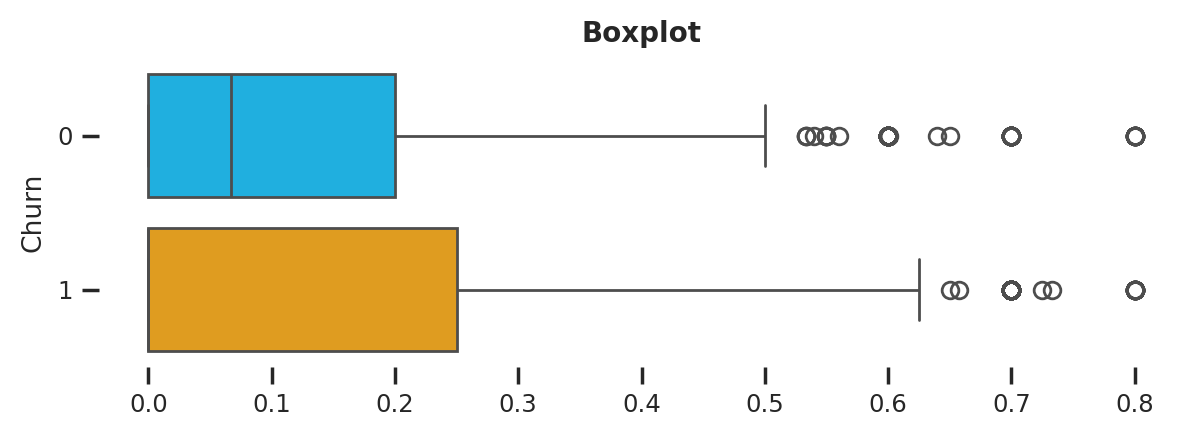

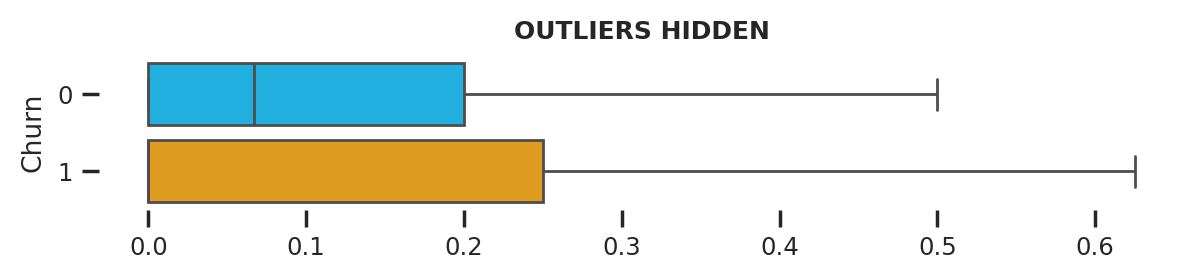

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",0.138,0.183,0.000,0.000,0.067,0.200,0.800
1,"9,791.000",0.146,0.210,0.000,0.000,0.000,0.250,0.800


In [36]:
feature = 'Avg_Discount'
binwidth = 0.05
view_distributions(data, feature, binwidth)

**NOTE**: The top quartile of Churners tend to receive slightly higher discounts.

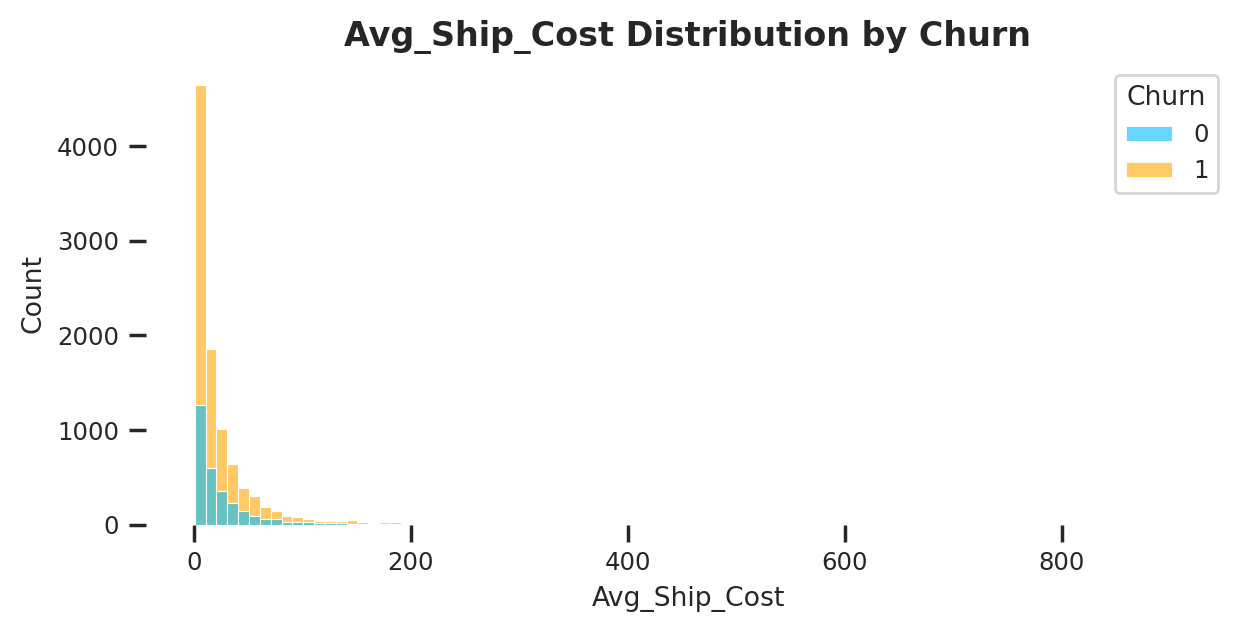

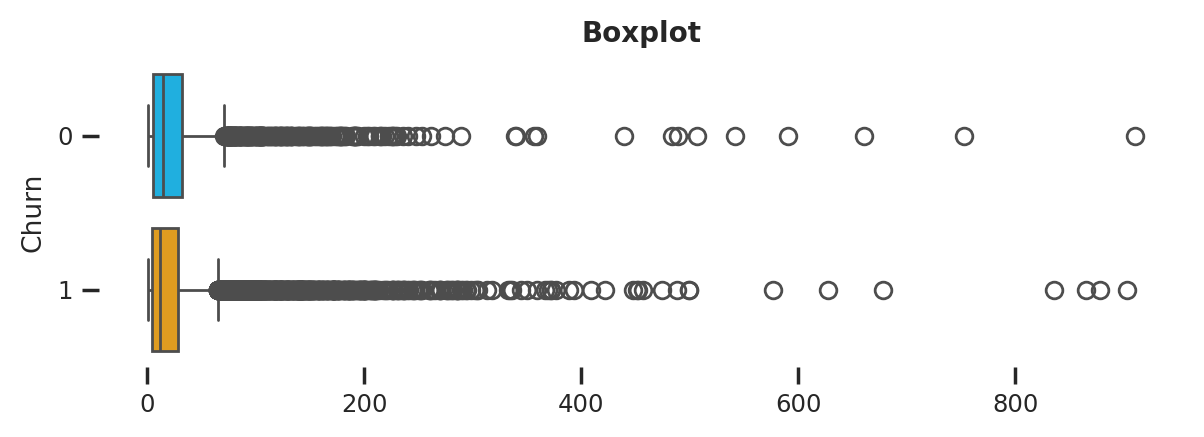

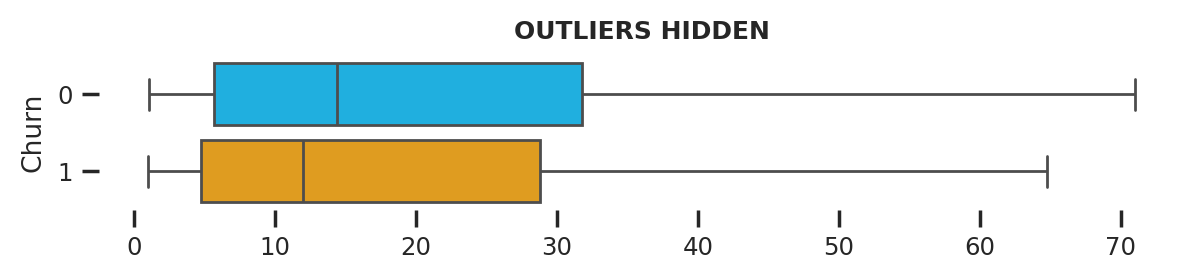

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,"2,989.000",28.287,49.151,1.040,5.630,14.383,31.797,910.160
1,"9,791.000",26.020,45.279,1.002,4.747,11.970,28.799,903.040


In [37]:
feature = 'Avg_Ship_Cost'
binwidth = 10
view_distributions(data, feature, binwidth)

**NOTE**: Predictably, Churners have slightly lower Avg Ship Cost, corresponding with making smaller purchases.

## Create Date Features
1. **Lifespan:** difference between min and max order date
1. **Frequency:** avg difference between all order dates
1. **Days to Ship:** avg days between order date and ship date
1. **Recency:** difference between max order date and target date 2023-01-01

In [38]:
customer_date_features = transaction_features.groupby('Customer ID').agg(
    Lifespan=('Order Date', lambda x: (x.max() - x.min()).days),
    Frequency=('Order Date', lambda x: int(np.mean(np.diff(x.sort_values()).astype('timedelta64[D]').astype(int))) if len(x) > 1 else 0),
    Days_to_Ship=('Order Date', lambda x: np.mean((transaction_features.loc[x.index,'Ship Date'] - transaction_features.loc[x.index,'Order Date']).dt.days)),
    Recency=('Order Date', lambda x: (pd.to_datetime('2023-01-01') - x.max()).days)
)

# Handle potential errors (e.g., a single order date)
customer_date_features['Frequency'] = customer_date_features['Frequency'].fillna(0)
customer_date_features['Days_to_Ship'] = customer_date_features['Days_to_Ship'].fillna(0)

# Display updated dataframe (optional)
customer_date_features.sample(25)

,Lifespan,Frequency,Days_to_Ship,Recency
Customer ID,,,,
CM-1193527,0,0,5.000,172
AG-1039080,0,0,3.000,63
BW-1120059,3,0,5.000,849
AF-10870102,0,0,4.000,1008
TB-21280139,562,281,1.667,189
SW-2027536,0,0,5.000,418
EM-1381048,810,810,5.000,49
JC-610560,0,0,4.000,788
MS-753077,0,0,0.000,573


In [39]:
customer_date_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12780 entries, AA-10315102 to ZD-2192596
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lifespan      12780 non-null  int64  
 1   Frequency     12780 non-null  int64  
 2   Days_to_Ship  12780 non-null  float64
 3   Recency       12780 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 499.2+ KB


In [40]:
customer_date_features.describe()

,Lifespan,Frequency,Days_to_Ship,Recency
count,"12,780.000","12,780.000","12,780.000","12,780.000"
mean,98.672,40.556,3.966,417.449
std,219.997,111.948,1.628,305.988
min,0.000,0.000,0.000,1.000
25%,0.000,0.000,3.000,139.000
50%,0.000,0.000,4.000,383.000
75%,0.000,0.000,5.000,653.000
max,"1,085.000","1,062.000",7.000,"1,096.000"


## Combine Numeric and Date Features

In [41]:
Customer_Features = pd.merge(Customer_Features, customer_date_features, on='Customer ID', how='left')
Customer_Features.head(12)

,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost,Lifespan,Frequency,Days_to_Ship,Recency
Customer ID,,,,,,,,,,,,
AA-10315102,4,5.750,242.837,971.348,-106.939,-427.756,0.450,11.338,0,0,3.000,912
AA-10315120,1,7.000,"6,512.184","6,512.184",65.016,65.016,0.000,167.350,0,0,5.000,595
AA-10315139,4,2.000,210.348,841.392,55.566,222.264,0.000,22.852,69,23,2.000,35
AA-103151402,4,3.500,"2,643.643","10,574.573",-448.261,"-1,793.045",0.200,71.680,0,0,5.000,303
AA-103151404,3,2.000,602.806,"1,808.419",219.546,658.637,0.067,21.120,553,276,4.333,454
AA-103151406,2,2.500,35.400,70.800,15.939,31.878,0.000,1.650,0,0,5.000,839
AA-1031548,1,4.000,163.555,163.555,54.403,54.403,0.100,5.350,0,0,5.000,147
AA-1031558,1,4.000,"1,198.656","1,198.656",431.424,431.424,0.000,30.630,0,0,6.000,1
AA-1031582,5,4.200,303.754,"1,518.768",109.901,549.504,0.000,12.032,439,109,2.800,330


## Check for Multicollinearity

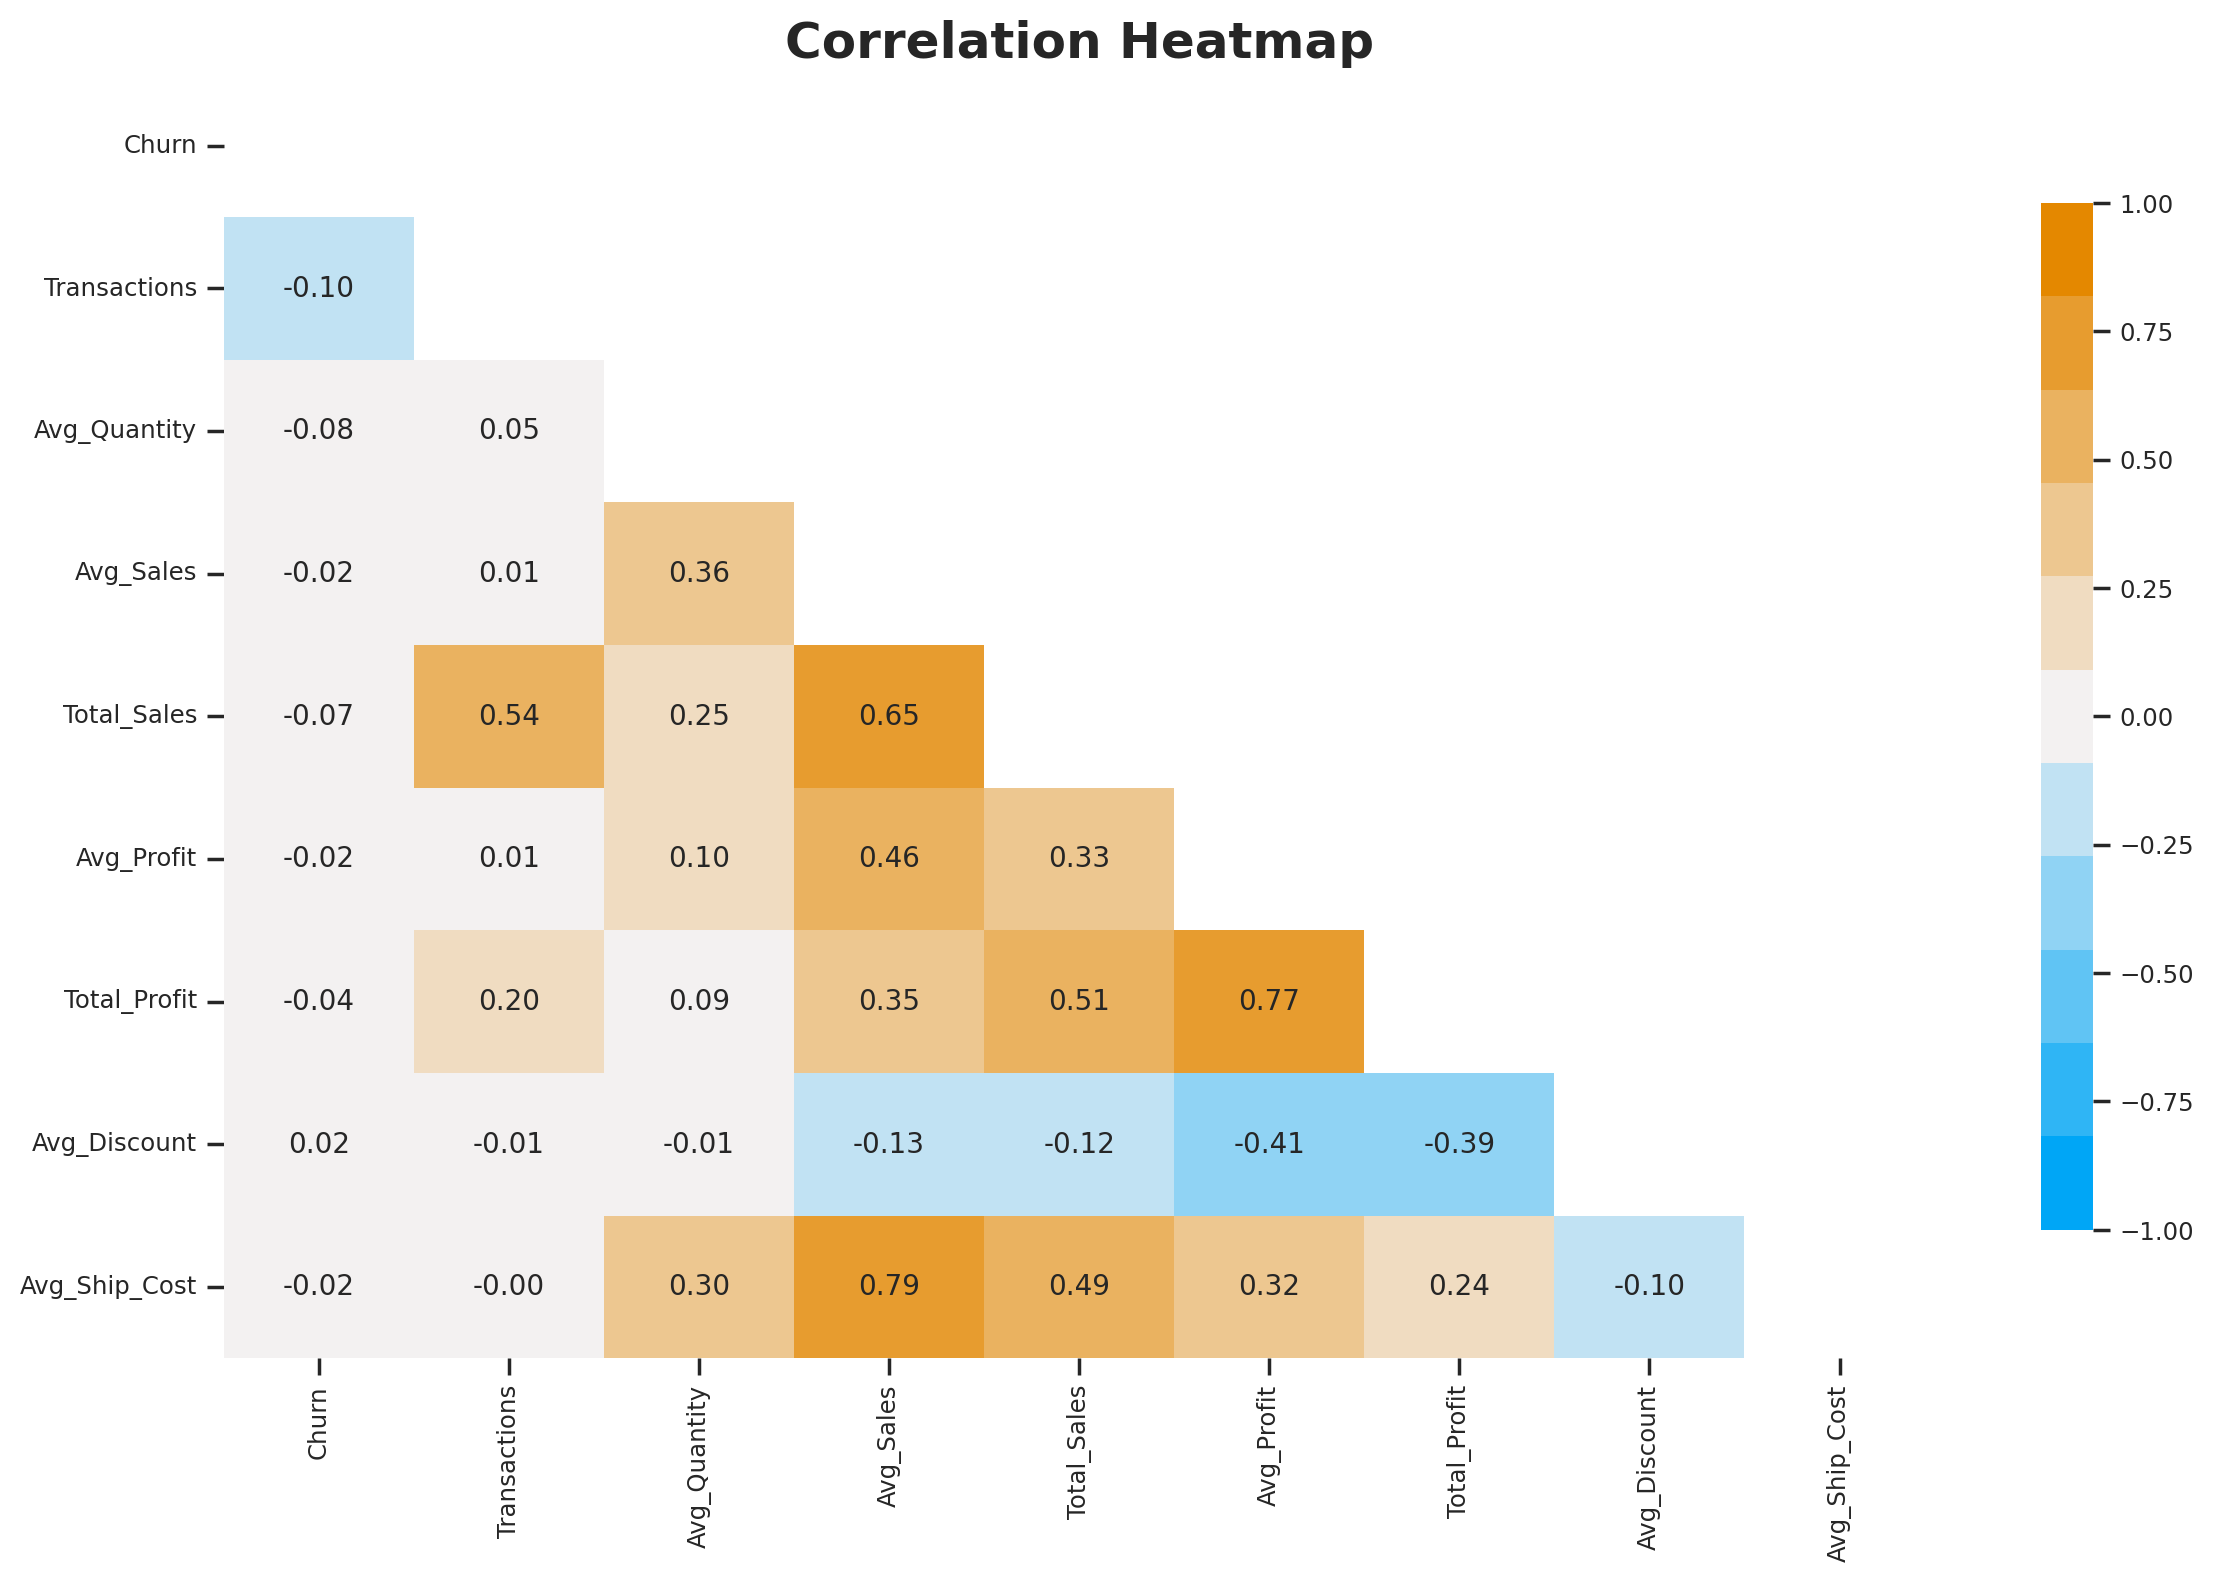

In [42]:
# Calculate the correlation matrix
corr = Superstore_Churn_DF.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the plot
plt.figure(figsize=(12, 8))
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold')

# Draw the heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cpd,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",                  # Format annotations to 2 decimal places
    annot_kws={"size": 10},      # Optional: Adjust annotation font size
    cbar_kws={"shrink": 0.8}     # Optional: Make the colorbar a little smaller
)

# Improve layout
plt.tight_layout()
plt.show()


**NOTES:**

None are above 0.8.

These are above 0.7. We may want to remove one of these pairs in a next iteration:
  - Avg_Ship_Cost : Avg_Sales = .79
  - Total_Profit : Avg_Profit = .77
  - Frequency : Lifespan = .77

# Prepare Final Dataframe for Machine Learning


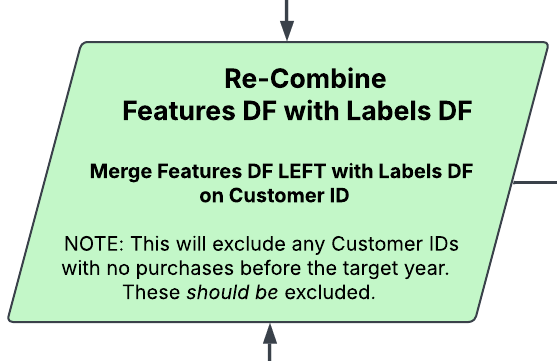

In [43]:
# Revisit Labels Dataframe
Customer_Labels.head(12)

,Churn
Customer ID,
AA-10315102,0
AA-10315120,1
AA-10315139,0
AA-103151402,0
AA-103151404,1
AA-103151406,1
AA-1031548,1
AA-1031558,0
AA-1031582,1


In [44]:
# Merge Features Dataframe and Labels Dataframe
# Use Customer ID as the common key
Superstore_Churn_DF = Customer_Labels.merge(Customer_Features, on='Customer ID')
Superstore_Churn_DF.sample(20)

,Churn,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost,Lifespan,Frequency,Days_to_Ship,Recency
Customer ID,,,,,,,,,,,,,
RF-1984048,1,4,3.750,621.594,"2,486.376",218.970,875.880,0.025,21.025,0,0,4.000,520
VT-217001406,1,8,4.000,490.907,"3,927.254",-77.376,-619.008,0.350,14.981,0,0,5.000,636
DP-1316593,0,2,3.500,276.480,552.960,53.640,107.280,0.000,22.221,0,0,4.000,349
BP-11290130,1,1,1.000,13.470,13.470,-6.618,-6.618,0.470,1.570,0,0,6.000,44
AG-1033055,1,1,7.000,56.448,56.448,-19.824,-19.824,0.400,2.016,0,0,4.000,800
SC-20095120,1,1,2.000,"1,744.416","1,744.416",-959.472,-959.472,0.600,47.100,0,0,4.000,750
EM-1382566,1,5,2.400,"1,103.890","5,519.448",324.994,"1,624.968",0.000,133.770,0,0,0.000,155
VG-1180561,1,2,1.500,559.692,"1,119.384",202.680,405.360,0.000,13.460,0,0,4.000,568
MC-1763566,0,1,2.000,264.672,264.672,132.336,132.336,0.000,20.560,0,0,3.000,82


In [45]:
# Get an overview of our combined dataframe
Superstore_Churn_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12780 entries, AA-10315102 to ZD-2192596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Churn          12780 non-null  int64  
 1   Transactions   12780 non-null  int64  
 2   Avg_Quantity   12780 non-null  float64
 3   Avg_Sales      12780 non-null  float64
 4   Total_Sales    12780 non-null  float64
 5   Avg_Profit     12780 non-null  float64
 6   Total_Profit   12780 non-null  float64
 7   Avg_Discount   12780 non-null  float64
 8   Avg_Ship_Cost  12780 non-null  float64
 9   Lifespan       12780 non-null  int64  
 10  Frequency      12780 non-null  int64  
 11  Days_to_Ship   12780 non-null  float64
 12  Recency        12780 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.4+ MB


In [46]:
# Get numbers of churn vs non-churners
Superstore_Churn_DF['Churn'].value_counts()

,count
Churn,
1,9791
0,2989


In [47]:
# Get percentages of churn vs non-churners
Superstore_Churn_DF['Churn'].value_counts(normalize=True)

,proportion
Churn,
1,0.766
0,0.234


# Machine Learning

We will check the quality of our feature engineering by creating predictions using an efficient and effective machine learning model:

The Random Forest Classifier from Scikit Learn

In [48]:
# Take our prepared dataframe and create X as the features set and y as the labels
X = Superstore_Churn_DF.drop(columns=['Churn'])
y = Superstore_Churn_DF['Churn']

In [49]:
# Preview the features we'll use for machine learning
X.head(12)

,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost,Lifespan,Frequency,Days_to_Ship,Recency
Customer ID,,,,,,,,,,,,
AA-10315102,4,5.750,242.837,971.348,-106.939,-427.756,0.450,11.338,0,0,3.000,912
AA-10315120,1,7.000,"6,512.184","6,512.184",65.016,65.016,0.000,167.350,0,0,5.000,595
AA-10315139,4,2.000,210.348,841.392,55.566,222.264,0.000,22.852,69,23,2.000,35
AA-103151402,4,3.500,"2,643.643","10,574.573",-448.261,"-1,793.045",0.200,71.680,0,0,5.000,303
AA-103151404,3,2.000,602.806,"1,808.419",219.546,658.637,0.067,21.120,553,276,4.333,454
AA-103151406,2,2.500,35.400,70.800,15.939,31.878,0.000,1.650,0,0,5.000,839
AA-1031548,1,4.000,163.555,163.555,54.403,54.403,0.100,5.350,0,0,5.000,147
AA-1031558,1,4.000,"1,198.656","1,198.656",431.424,431.424,0.000,30.630,0,0,6.000,1
AA-1031582,5,4.200,303.754,"1,518.768",109.901,549.504,0.000,12.032,439,109,2.800,330


In [50]:
# Preview the labels we'll use for machine learning
y.head(12)

,Churn
Customer ID,
AA-10315102,0
AA-10315120,1
AA-10315139,0
AA-103151402,0
AA-103151404,1
AA-103151406,1
AA-1031548,1
AA-1031558,0
AA-1031582,1


In [51]:
# Import libraries and packages for prediction and evaluation

# For creating train/test splits
from sklearn.model_selection import train_test_split

# For the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# For evaluating a model's predictive performance
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix


In [52]:
# Create a train / test split, with 30% of the data for test.

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# See the shape of each split compared to the total records: the number and proportion of train and test features and their labels
print(f'Total Records: {len(y)}')
print(f'Train Split: {X_train.shape[0]} Records, {len(y_train)} Labels = {round(len(y_train)/len(y), 4) * 100}%')
print(f'Test Split: {X_test.shape[0]} Records, {len(y_test)} Labels = {round(len(y_test)/len(y), 4) * 100}%')

# Preview the training data
X_train.head()

Total Records: 12780
Train Split: 8946 Records, 8946 Labels = 70.0%
Test Split: 3834 Records, 3834 Labels = 30.0%


,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost,Lifespan,Frequency,Days_to_Ship,Recency
Customer ID,,,,,,,,,,,,
LO-171701408,2,4.000,211.956,423.912,19.668,39.335,0.000,14.740,0,0,2.000,695
SB-1018586,4,2.500,378.486,"1,513.944",114.930,459.720,0.000,12.435,61,20,4.250,37
MC-7575137,1,1.000,32.112,32.112,12.168,12.168,0.000,1.790,0,0,4.000,681
JF-1519058,5,3.600,612.518,"3,062.592",83.376,416.880,0.000,19.132,44,11,5.200,61
AC-42022,3,1.000,130.896,392.688,13.728,41.184,0.000,6.277,0,0,3.000,932


In [53]:
# Predict churn using the Random Forest classification model from scikit learn

# Set Random Forest classifier as the algorithm for this prediction
algorithm = RandomForestClassifier(random_state=42)

# Train a prediction model by fitting the algorithm to the training set
model = algorithm.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

print('Predictions Complete\n')

# Dataframe of predicted churn probabilities and churn predictions (0 or 1) per customer
results_df = X_test.copy()
results_df['churn'] = y_test
results_df['predicted_probability'] = model.predict_proba(X_test)[:, 1]
results_df['prediction'] = y_pred

results_df.sample(30)

Predictions Complete



,Transactions,Avg_Quantity,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Discount,Avg_Ship_Cost,Lifespan,Frequency,Days_to_Ship,Recency,churn,predicted_probability,prediction
Customer ID,,,,,,,,,,,,,,,
NL-831038,2,1.500,266.652,533.304,75.240,150.480,0.000,15.490,0,0,2.000,211,1,0.910,1
JM-156557,6,3.333,"1,589.540","9,537.242",412.604,"2,475.626",0.150,191.668,60,12,3.167,127,0,0.600,1
GM-4455134,1,1.000,9.878,9.878,-7.690,-7.690,0.600,1.630,0,0,1.000,75,0,0.540,1
GT-4635107,1,1.000,33.552,33.552,12.024,12.024,0.000,1.530,0,0,4.000,183,1,0.970,1
HM-1498044,2,2.500,"1,191.492","2,382.984",329.328,658.656,0.000,37.220,0,0,5.000,167,1,0.820,1
CS-1240045,1,6.000,929.750,929.750,76.550,76.550,0.150,114.520,0,0,2.000,265,0,0.560,1
SM-2095027,4,4.500,666.234,"2,664.936",76.626,306.504,0.000,15.380,145,48,5.000,77,1,0.870,1
HW-1493545,1,6.000,214.618,214.618,-9.590,-9.590,0.100,30.270,0,0,2.000,147,0,0.570,1
RA-1994582,3,3.667,"1,808.080","5,424.240",68.688,206.064,0.000,39.492,146,73,2.667,359,1,0.740,1


# Machine Learning Prediction Performance Metrics

In [54]:
# Report the accuracy, precision, and recall scores of the model

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

print('RESULTS')
print(f'Accuracy: \t{accuracy:.3f}%')
print(f'Precision: \t{precision:.3f}%')
print(f'Recall: \t{recall:.3f}%')

RESULTS
Accuracy: 	75.561%
Precision: 	77.490%
Recall: 	95.870%


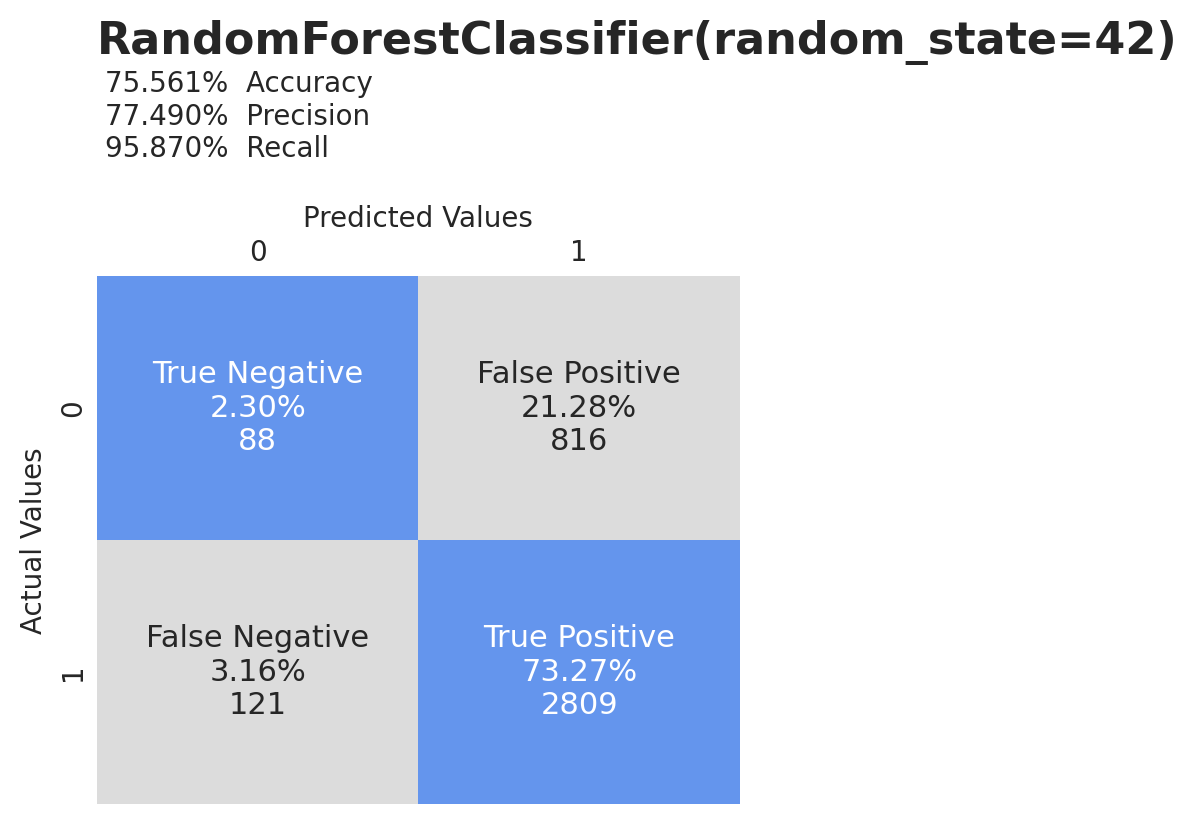

In [55]:
# Generate a better custom Confusion Matrix

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

cm = confusion_matrix(y_test, y_pred)
# Normalize true, pred, or all
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')
cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

# axis labels for the confusion matrix plot
cm_y_labels = ['0','1'] # column labels
cm_x_labels = ['0','1'] # row labels

# Confusion matrix labels
# Review and update to match the appropriate labels for your data set
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
group_labels = np.asarray(group_labels).reshape(2,2)

# Begin plot setup
fig, ax = plt.subplots(figsize=(4.2, 4.2))

# Heatmap
sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='',
            cmap=cm_colors, cbar=False,
            yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)

# Axis elements
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

# Position group labels and set colors
for text_elt, group_label in zip(ax.texts, group_labels):
    ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
            ha='center', va='top')

# Title for each plot
# Adjust pad to provide room for the score report below title and above confusion matrix plot
plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')

# Score reports beneath each title
# Adjust x and y to fit report
plt.figtext(0.21, 0.81, f'{accuracy:.3f}%  Accuracy\n{precision:.3f}%  Precision\n{recall:.3f}%  Recall', wrap=True, ha='left', fontsize=10)

# Disply the plot!
plt.tight_layout()
plt.subplots_adjust(left=0.2)
print('\n') # Add a blank line for improved spacing
plt.show()

# Feature Importances

An approximate measure of relevance for each feature: The proportional influence each feature had in the prediction process.



In [56]:
# Get feature importances from the trained RandomForestClassifier model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Make Feature the new index
feature_importance_df = feature_importance_df.set_index('Feature')

# Print the features and their importances
print("Feature Importances:")
feature_importance_df


Feature Importances:


,Importance
Feature,
Avg_Ship_Cost,0.117
Avg_Profit,0.115
Recency,0.115
Avg_Sales,0.114
Total_Profit,0.112
Total_Sales,0.112
Avg_Quantity,0.077
Avg_Discount,0.065
Days_to_Ship,0.063
